# Banking and Financial Services Capstone Project

CredX is a leading credit card provider that gets thousands of credit card applications every year. But in the past few years, it has experienced an increase in credit loss. The CEO believes that the best strategy to mitigate credit risk is to ‘acquire the right customers’.

In this project, our task is to help CredX identify the right customers using predictive models. Using past data of the bank’s applicants, we need to determine the factors affecting credit risk, create strategies to mitigate the acquisition risk and assess the financial benefit of your project.

##### There are two data sets in this project: demographic and credit bureau data.  

##### 1) Demographic/application data: 
This is obtained from the information provided by the applicants at the time of credit card application. It contains customer-level information on age, gender, income, marital status, etc.

##### 2) Credit bureau: 
This is taken from the credit bureau and contains variables such as 'number of times 30 DPD or worse in last 3/6/12 months', 'outstanding balance', 'number of trades', etc.

##### Following tasks need to be perfomed as a part of this project:

1 ) Need to Perform WOE & IV analysis on the given datasets.
Apply WOE Transformation on the Demographics dataset and on the master dataset(combination of the two give datasets).

2 ) Build following models on WOE Transformed datasets:

    2.1) Demographic data model: Build a model to predict the likelihood of default using only the demographic data. This will give you a good idea about the predictive power of the application data. Obviously, the final model will use the credit bureau data as well, though this model is an important part of understanding the predictive power of application data.

    2.2) Model using both demographic and credit bureau data: Build a model to predict default using both the data sets. You may choose any type of model, though it is recommended to start with a logistic regression model first. Further, you can choose any type of model.


3) Build an application scorecard with the good to bad odds of 10 to 1 at a score of 400 doubling every 20 points.

4) We would be Assessing the financial benefit of our project.
We need to assess and explain the potential financial benefit of your project to the bank's management. From a P&L perspective, identify the metrics you are trying to optimise, explain (in simple terms) how the analysis and the model work, and share the results of the model. Finally, assess the financial benefit of the model and report the following:

    4.1) The implications of using the model for auto-approval or rejection, i.e., how many applicants on an average would the model automatically approve or reject

    4.2) The potential credit loss avoided with the help of the model

    4.3) Assumptions based on which the model was built 

In [280]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import xticks
%matplotlib inline
from sklearn.metrics import precision_score, recall_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import statsmodels.api as sm
from sklearn.metrics import precision_recall_curve
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image  
from six import StringIO  
# from sklearn.tree import export_graphviz
# import pydotplus, graphviz
import os
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import StratifiedKFold

# Load demographic data

In [281]:
demographic = pd.read_csv("/kaggle/input/demo-data-eda/Demographic data.csv")
demographic.head()

,Application ID,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,Performance Tag
0,954457215,48,F,Married,2.0,40.0,Bachelor,SAL,Rented,113,56,0.0
1,432830445,31,M,Married,4.0,55.0,Professional,SE_PROF,Rented,112,46,0.0
2,941387308,32,M,Single,2.0,46.0,Bachelor,SE_PROF,Rented,104,49,0.0
3,392161677,43,M,Married,1.0,53.0,Bachelor,SE,Rented,94,53,0.0
4,182011211,35,F,Married,5.0,44.0,Professional,SAL,Rented,112,43,0.0


In [282]:
# lets check the dimensions of the data set
demographic.shape

(71295, 12)

In [283]:
# lets check the dataset for numeric variables
demographic.describe()

,Application ID,Age,No of dependents,Income,No of months in current residence,No of months in current company,Performance Tag
count,7.129500e+04,71295.000000,71292.000000,71295.000000,71295.000000,71295.000000,69870.000000
mean,4.989601e+08,44.943039,2.865188,27.195224,34.563420,33.958244,0.042193
std,2.885905e+08,9.939211,1.382319,15.514626,36.759758,20.410824,0.201030
min,1.004500e+05,-3.000000,1.000000,-0.500000,6.000000,3.000000,0.000000
25%,2.483719e+08,37.000000,2.000000,14.000000,6.000000,16.000000,0.000000
50%,4.975698e+08,45.000000,3.000000,27.000000,11.000000,34.000000,0.000000
75%,7.495868e+08,53.000000,4.000000,40.000000,60.000000,51.000000,0.000000
max,1.000084e+09,65.000000,5.000000,60.000000,126.000000,133.000000,1.000000


Age & Income variables have negative values, we will treat them later

In [284]:
# lets check the name of all the columns
print("Columns Name:",demographic.columns)

# Field "Profession " seems to have an extra space at the end, lets rename it
demographic = demographic.rename(columns = {"Profession " : "Profession"})

# lets rename 'Marital Status (at the time of application)' to Marital Status so that it can be used easily further
demographic = demographic.rename(columns = {"Marital Status (at the time of application)" : "Marital Status"})

print("\nColumns Names after renaming the columns:",demographic.columns)

Columns Name: Index(['Application ID', 'Age', 'Gender',
       'Marital Status (at the time of application)', 'No of dependents',
       'Income', 'Education', 'Profession ', 'Type of residence',
       'No of months in current residence', 'No of months in current company',
       'Performance Tag'],
      dtype='object')

Columns Names after renaming the columns: Index(['Application ID', 'Age', 'Gender', 'Marital Status', 'No of dependents',
       'Income', 'Education', 'Profession', 'Type of residence',
       'No of months in current residence', 'No of months in current company',
       'Performance Tag'],
      dtype='object')


In [285]:
# checking number of unique entries for all the variables
print("No. of unique values - Column wise:\n",demographic.nunique())

No. of unique values - Column wise:
 Application ID                       71292
Age                                     53
Gender                                   2
Marital Status                           2
No of dependents                         5
Income                                  63
Education                                5
Profession                               3
Type of residence                        5
No of months in current residence      121
No of months in current company         83
Performance Tag                          2
dtype: int64


Looks like there are some duplicate application ids, lets check

In [286]:
# lets display the duplicate records for application id
dup_app_id = demographic["Application ID"]
dup_customers = demographic[dup_app_id.isin(dup_app_id[dup_app_id.duplicated()])]
dup_customers.sort_values(by='Application ID')

,Application ID,Age,Gender,Marital Status,No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,Performance Tag
5243,653287861,26,M,Married,3.0,25.0,Bachelor,SAL,Rented,112,58,0.0
42637,653287861,40,M,Married,5.0,32.0,Phd,SE,Rented,45,46,1.0
48602,671989187,27,M,Married,2.0,35.0,Professional,SAL,Living with Parents,108,7,0.0
59022,671989187,57,M,Married,4.0,7.0,Professional,SE,Rented,42,3,0.0
24386,765011468,57,M,Single,4.0,4.5,Bachelor,SAL,Company provided,6,56,0.0
27586,765011468,38,M,Married,4.0,4.5,Professional,SAL,Rented,6,72,0.0


### Observation: 

Even though the application ids are same, the records are completely different, which means records belongs to different customers. We are assuming that the 2nd records here with the same application ids  are invalid entries and we are going to drop them.

In [287]:
duplicate_ids = demographic[demographic.duplicated(subset=['Application ID'], keep=False)]['Application ID'].unique()

# Iterate over duplicate IDs and rename them
for id_ in duplicate_ids:
    indices = demographic[demographic['Application ID'] == id_].index
    for i, idx in enumerate(indices):
        demographic.at[idx, 'Application ID'] = f"{id_}_{i+1}"

In [288]:
# lets display the duplicate records for application id
dup_app_id = demographic["Application ID"]
dup_customers = demographic[dup_app_id.isin(dup_app_id[dup_app_id.duplicated()])]
dup_customers.sort_values(by='Application ID')

,Application ID,Age,Gender,Marital Status,No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,Performance Tag


In [289]:
# Check the column-wise info of the dataframe
demographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71295 entries, 0 to 71294
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Application ID                     71295 non-null  object 
 1   Age                                71295 non-null  int64  
 2   Gender                             71293 non-null  object 
 3   Marital Status                     71289 non-null  object 
 4   No of dependents                   71292 non-null  float64
 5   Income                             71295 non-null  float64
 6   Education                          71176 non-null  object 
 7   Profession                         71281 non-null  object 
 8   Type of residence                  71287 non-null  object 
 9   No of months in current residence  71295 non-null  int64  
 10  No of months in current company    71295 non-null  int64  
 11  Performance Tag                    69870 non-null  flo

Above data shows that few fields have null values, lets check the details

In [290]:
# Doubt 1
# What if a particular column is not missing in the train data but it found few missing cases
# in test data. If we are trying out with Logistic Regression or weak learners then our model
# will not work in production because these algorithms doesn't have inherent characteristic to 
# deal with missing values.

# Doubt 2
#  What if the test data distribution is different than train data distribution. For example:-
#  in the train data age column is in range of 25 to 60 but in test data we found few ages 
#  which are either ineligible/corrupt. 

In [291]:
# Remove the rows with performance tag as NULL
# Remove those rows where performance tag is NA
Demo_tag_clean = demographic.dropna(subset=['Performance Tag'])
Demo_tag_clean.shape

(69870, 12)

In [292]:
demo_tag_na = demographic[pd.isna(demographic['Performance Tag'])]
print(demo_tag_na.shape)

(1425, 12)


In [293]:
# Divide the data in Train Set, Test Set & Cross Validation Set. 
#  Train Set > Build the Model
#  Test Set > Test the model and tune the hyperparameters
#  Cross Validation > test the tuned model. 

In [294]:
X = Demo_tag_clean.drop(columns=['Performance Tag'])
y = Demo_tag_clean['Performance Tag']

In [295]:
X_train, testx, y_train, testy = train_test_split(X, y, test_size=0.3, random_state=42)

X_test, X_cv, y_test, y_cv = train_test_split(testx, testy, test_size=0.5, random_state=42)

In [296]:
print(Demo_tag_clean.shape)
print(X_train.shape)
print(X_test.shape)
print(X_cv.shape)

(69870, 12)
(48909, 11)
(10480, 11)
(10481, 11)


In [297]:
# lets check null values column wise
X_train.isnull().sum().sort_values(ascending = False)

Education                            85
Profession                           12
Type of residence                     5
Marital Status                        4
No of dependents                      3
Gender                                2
Application ID                        0
Age                                   0
Income                                0
No of months in current residence     0
No of months in current company       0
dtype: int64

In [298]:
X_test.isnull().sum().sort_values(ascending = False)

Education                            21
Type of residence                     3
Marital Status                        1
Application ID                        0
Age                                   0
Gender                                0
No of dependents                      0
Income                                0
Profession                            0
No of months in current residence     0
No of months in current company       0
dtype: int64

In [299]:
X_cv.isnull().sum().sort_values(ascending = False)

Education                            12
Marital Status                        1
Profession                            1
Application ID                        0
Age                                   0
Gender                                0
No of dependents                      0
Income                                0
Type of residence                     0
No of months in current residence     0
No of months in current company       0
dtype: int64

In [300]:
# lets check the % of null values column wise
(round(100*(X_train.isnull().sum()/len(X_train.index)), 2)).sort_values(ascending = False)

Education                            0.17
Profession                           0.02
Marital Status                       0.01
No of dependents                     0.01
Type of residence                    0.01
Application ID                       0.00
Age                                  0.00
Gender                               0.00
Income                               0.00
No of months in current residence    0.00
No of months in current company      0.00
dtype: float64

Lets treat null values and missing values one by one

# Null Values in the Demographic dataset

In [301]:
# lets check variables except "Application ID"
cols = X_train.drop("Application ID",axis = 1)

print('\nUnique values in the datafram - column wise:')
for i in cols:
    print(i,demographic[i].nunique(), demographic[i].unique(),'\n')


Unique values in the datafram - column wise:
Age 53 [48 31 32 43 35 20 42 34 30 22 37 41 38 33 45 51 36 29 40 19 25 28 50 27
 26 49 47 39 17 44 23 46 52 53 24 18 15 21 16 64 56 55 60 59 54 58 62 65
 61 57 63  0 -3] 

Gender 2 ['F' 'M' nan] 

Marital Status 2 ['Married' 'Single' nan] 

No of dependents 5 [ 2.  4.  1.  5.  3. nan] 

Income 63 [40.  55.  46.  53.  44.  39.  49.  48.  38.  43.  51.  54.  50.  28.
 52.  27.  37.  36.  42.  32.  24.  25.  47.  31.  33.  35.  26.  34.
 41.  45.  13.  19.  29.  18.   7.  30.  23.  21.  14.   2.  22.   3.
  6.  15.  16.  20.  11.  17.  12.   5.   4.  10.   9.  -0.5  8.   1.
  0.   4.5 60.  57.  59.  58.  56. ] 

Education 5 ['Bachelor' 'Professional' 'Masters' 'Phd' 'Others' nan] 

Profession 3 ['SAL' 'SE_PROF' 'SE' nan] 

Type of residence 5 ['Rented' nan 'Owned' 'Others' 'Living with Parents' 'Company provided'] 

No of months in current residence 121 [113 112 104  94 116 108 115 111  90  83 106  81 100 107  96  92 103  82
  97  80  77  76  

### Observations:

1. Variable Age seems to have some invalid data (0 ,-3 and all values less than 18)
2. Variables Gender/Marital Status/No. Of dependents/Education/Profession/Type of residence/Performance Tag have few null values
3. Variable Income has a negative value

Lets correct them one by one

In [302]:
X_train[X_train.Age < 18].shape
# Treat it like missing value

(46, 11)

In [303]:
# lets assume credit card can be given only to the customerers above 18 years of age, so, we will replace all the customers
# with age less than 18 to 18
X_train.loc[X_train.Age<18,'Age'] = None

Variable "Age" needs missing value imputation

In [304]:
print("NA in Gender:",X_train["Gender"].isna().sum())
X_train["Gender"].value_counts(normalize = True)*100

NA in Gender: 2


Gender
M    76.359212
F    23.640788
Name: proportion, dtype: float64

In [305]:
print("NA in Marital Status:",X_train["Marital Status"].isna().sum())
X_train["Marital Status"].value_counts(normalize = True)*100

NA in Marital Status: 4


Marital Status
Married    85.259176
Single     14.740824
Name: proportion, dtype: float64

In [306]:
print("NA in No of dependents:",X_train["No of dependents"].isna().sum())
X_train["No of dependents"].value_counts(normalize = True)*100

NA in No of dependents: 3


No of dependents
3.0    22.434875
1.0    21.772380
2.0    21.465669
4.0    17.286223
5.0    17.040854
Name: proportion, dtype: float64

In [307]:
X_train[X_train.Income <= 0].shape

(76, 11)

In [308]:
X_train.loc[X_train.Income<=0,'Income'] = None

In [309]:
print("NA in Education:",X_train["Education"].isna().sum())
X_train["Education"].value_counts(normalize = True)*100

NA in Education: 85


Education
Professional    34.878339
Masters         33.778470
Bachelor        24.840243
Phd              6.326806
Others           0.176143
Name: proportion, dtype: float64

In [310]:
print("NA in Profession:",X_train["Profession"].isna().sum())
X_train["Profession"].value_counts(normalize = True)*100

NA in Profession: 12


Profession
SAL        56.856249
SE_PROF    23.257051
SE         19.886701
Name: proportion, dtype: float64

In [316]:
print("NA in Type of residence:",X_train["Type of residence"].isna().sum())
X_train["Type of residence"].value_counts(normalize = True)*100

NA in Type of residence: 5


Type of residence
Rented                 74.844593
Owned                  19.951333
Living with Parents     2.605104
Company provided        2.335187
Others                  0.263782
Name: proportion, dtype: float64

In [317]:
print("NA in Performance Tag:",y_train.isna().sum())
y_train.value_counts(normalize = True)*100

NA in Performance Tag: 0


Performance Tag
0.0    95.843301
1.0     4.156699
Name: proportion, dtype: float64

In [318]:
demo2 = X_train.drop_duplicates()
print(demo2.shape)
print(X_train.shape)

(48909, 11)
(48909, 11)


In [319]:
print(X_train['Application ID'].nunique()) # There are no duplicate Application ID

48909


In [315]:
print(X_train.shape[0] - X_train.dropna(axis=0, how='any').shape[0])

228


# EDA for Demographic Data

In [320]:
# lets check count of different values for performance tag
y_train.value_counts(normalize = True)*100

Performance Tag
0.0    95.843301
1.0     4.156699
Name: proportion, dtype: float64

Data set is highly imbalanced as majority of the customers have a performance tag of 0 which means they are good customers.

In [321]:
X_train.head(2)

,Application ID,Age,Gender,Marital Status,No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company
64282,349360553,58.0,M,Married,5.0,4.5,Professional,SAL,Owned,58,3
54651,214585044,65.0,F,Single,5.0,14.0,Professional,SAL,Rented,105,28


In [322]:
X_train['Performance Tag'] = y_train

In [323]:
X_train = X_train.rename(columns = {"Age" : "age"})
X_train = X_train.rename(columns = {"Gender" : "gender"})


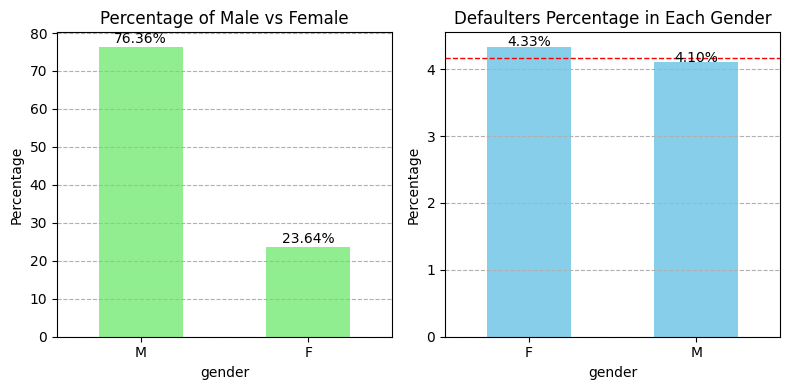

In [324]:
import matplotlib.pyplot as plt

# Calculate defaulters percentage for each category
def calculate_defaulters_percentage(data, category_column, target_column):
    defaulters_percentage = data.groupby(category_column)[target_column].mean() * 100
    return defaulters_percentage

# Plot bar chart for defaulters percentage
def plot_defaulters_bar_chart(data, category_column, target_column):
    defaulters_percentage = calculate_defaulters_percentage(data, category_column, target_column)
    ax = defaulters_percentage.plot(kind='bar', color='skyblue')
    plt.title('Defaulters Percentage in Each Gender')
    plt.xlabel(category_column)
    plt.ylabel('Percentage')
    ax.axhline(4.16, color='red', linestyle='dashed', linewidth=1, label=f'Mode: {4.16:.2f}')
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--')
    # Add percentage labels above the bars
    for i, value in enumerate(defaulters_percentage):
        ax.text(i, value +0.01, f'{value:.2f}%', ha='center')

# Plot bar chart for male vs female percentage
def plot_gender_bar_chart(data, category_column):
    gender_percentage = data[category_column].value_counts(normalize=True) * 100
    ax = gender_percentage.plot(kind='bar', color='lightgreen')
    plt.title('Percentage of Male vs Female')
    plt.xlabel(category_column)
    plt.ylabel('Percentage')
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--')
    # Add percentage labels above the bars
    for i, value in enumerate(gender_percentage):
        ax.text(i, value + 1, f'{value:.2f}%', ha='center')

# Create a figure with 1 row and 2 columns
plt.figure(figsize=(8, 4))

# Plot defaulters bar chart in the first subplot
plt.subplot(1, 2, 1)
plot_gender_bar_chart(X_train, 'gender')

# Plot gender bar chart in the second subplot
plt.subplot(1, 2, 2)
plot_defaulters_bar_chart(X_train, 'gender', 'Performance Tag')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()


In [325]:
X_train['Per_Capita_Income'] = X_train['Income']/(X_train['No of dependents'] + 1)
train_m = X_train[X_train.gender == 'M']

train_f = X_train[X_train.gender == 'F']

target_0 = X_train.loc[X_train["Performance Tag"] == 0]
target_1 = X_train.loc[X_train["Performance Tag"] == 1]

target_0_m = train_m.loc[train_m["Performance Tag"] == 0]
target_1_m = train_m.loc[train_m["Performance Tag"] == 1]

target_0_f = train_f.loc[train_f["Performance Tag"] == 0]
target_1_f = train_f.loc[train_f["Performance Tag"] == 1]

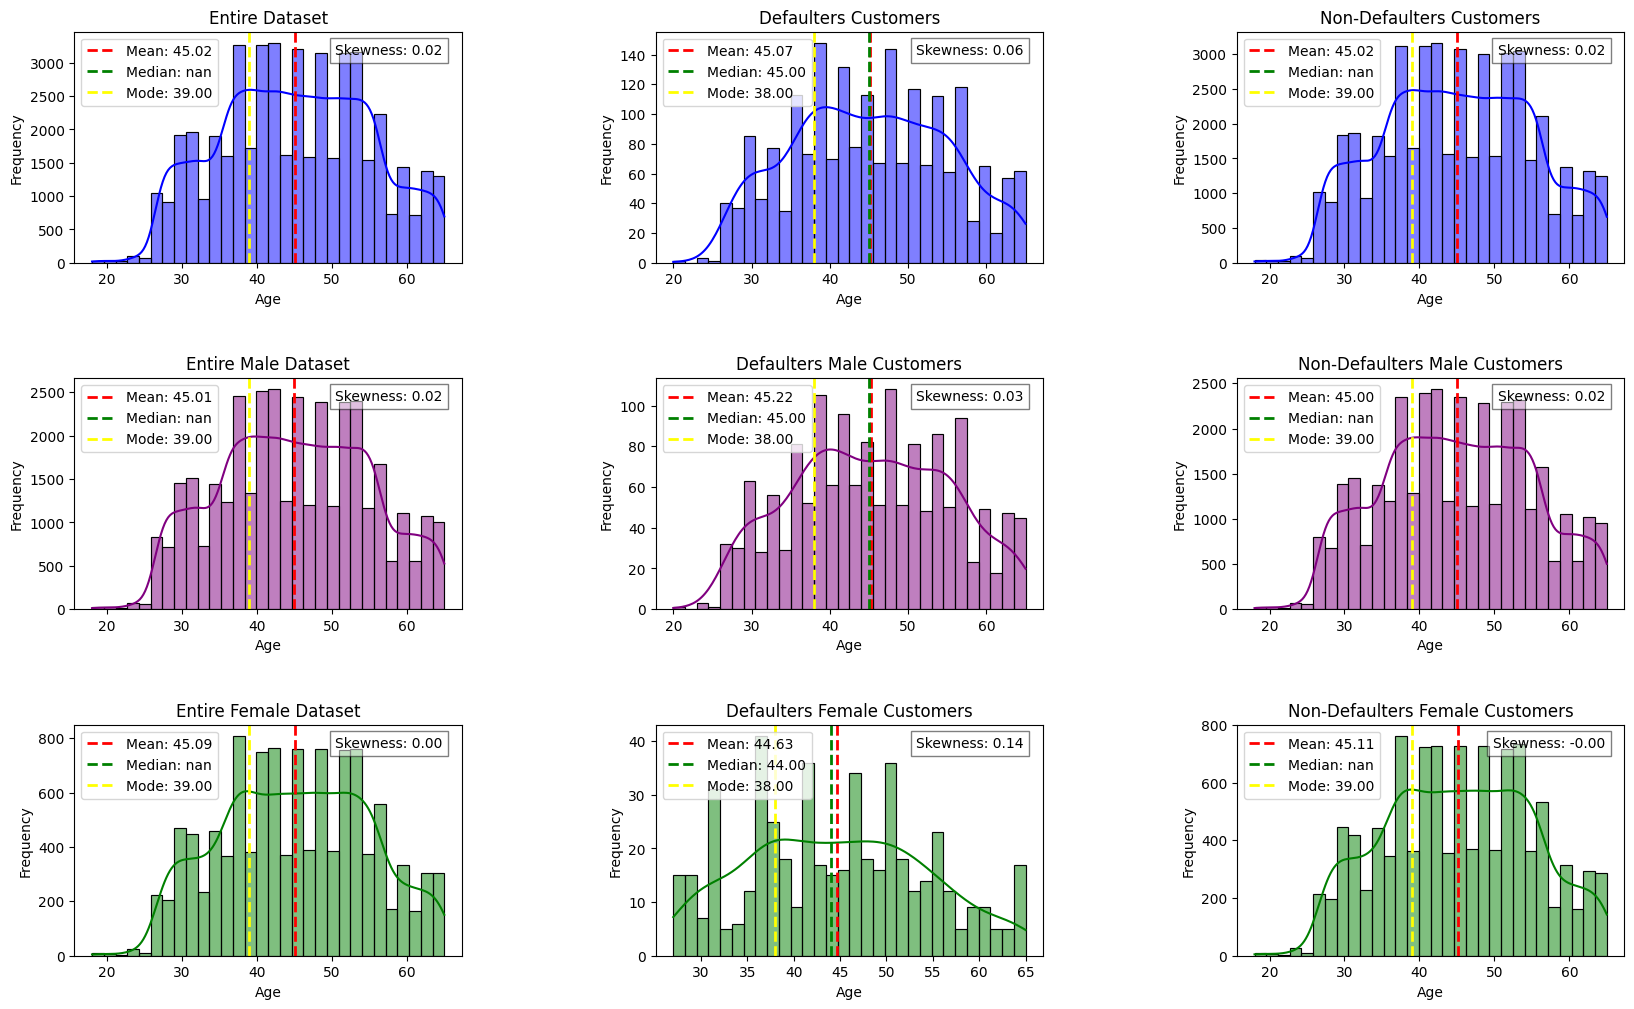

In [326]:
from scipy.stats import skew

fig, axes = plt.subplots(3, 3, figsize=(20, 12))  # Change figure size to (20, 12)
axes.flatten()
# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5, wspace=0.5)

# Define a function to calculate skewness and add it to the plot
def add_skewness_label(data, ax):
    valid_data = data.dropna()  # Drop NaN values
    skewness = skew(valid_data)
    if np.isnan(skewness):
        skewness_label = 'Skewness: Not computable'
    else:
        skewness_label = f'Skewness: {skewness:.2f}'
    ax.text(0.95, 0.95, skewness_label, transform=ax.transAxes, ha='right', va='top', fontsize=10, color='black', bbox=dict(facecolor='white', alpha=0.5))

# Plotting for the entire dataset
sns.histplot(X_train['age'], bins=30, kde=True, color='blue', ax=axes[0, 0])  # Changed indexing to [0, 0]
add_skewness_label(X_train['age'], axes[0, 0])  # Add skewness label
mean_age = np.mean(X_train['age'])
median_age = np.median(X_train['age'])
mode_age = X_train['age'].mode()[0]
axes[0, 0].axvline(mean_age, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_age:.2f}')
axes[0, 0].axvline(median_age, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_age:.2f}')
axes[0, 0].axvline(mode_age, color='yellow', linestyle='dashed', linewidth=2, label=f'Mode: {mode_age:.2f}')
axes[0, 0].set_title('Entire Dataset')

# Plotting for Defaulters Employees
sns.histplot(target_1['age'], bins=30, kde=True, color='blue', ax=axes[0, 1])  # Changed indexing to [0, 1]
add_skewness_label(target_1['age'], axes[0, 1])  # Add skewness label
mean_age = np.mean(target_1['age'])
median_age = np.median(target_1['age'])
mode_age = target_1['age'].mode()[0]
axes[0, 1].axvline(mean_age, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_age:.2f}')
axes[0, 1].axvline(median_age, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_age:.2f}')
axes[0, 1].axvline(mode_age, color='yellow', linestyle='dashed', linewidth=2, label=f'Mode: {mode_age:.2f}')
axes[0, 1].set_title('Defaulters Customers')

# Plotting for Non-Defaulters Employees
sns.histplot(target_0['age'], bins=30, kde=True, color='blue', ax=axes[0, 2])  # Changed indexing to [0, 2]
add_skewness_label(target_0['age'], axes[0, 2])  # Add skewness label
mean_age = np.mean(target_0['age'])
median_age = np.median(target_0['age'])
mode_age = target_0['age'].mode()[0]
axes[0, 2].axvline(mean_age, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_age:.2f}')
axes[0, 2].axvline(median_age, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_age:.2f}')
axes[0, 2].axvline(mode_age, color='yellow', linestyle='dashed', linewidth=2, label=f'Mode: {mode_age:.2f}')
axes[0, 2].set_title('Non-Defaulters Customers')

# Plotting for the entire dataset
sns.histplot(train_m['age'], bins=30, kde=True, color='purple', ax=axes[1, 0])  # Changed indexing to [1, 0]
add_skewness_label(train_m['age'], axes[1, 0])  # Add skewness label
mean_age = np.mean(train_m['age'])
median_age = np.median(train_m['age'])
mode_age = train_m['age'].mode()[0]
axes[1, 0].axvline(mean_age, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_age:.2f}')
axes[1, 0].axvline(median_age, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_age:.2f}')
axes[1, 0].axvline(mode_age, color='yellow', linestyle='dashed', linewidth=2, label=f'Mode: {mode_age:.2f}')
axes[1, 0].set_title('Entire Male Dataset')

# Plotting for Defaulters Employees
sns.histplot(target_1_m['age'], bins=30, kde=True, color='purple', ax=axes[1, 1])  # Changed indexing to [1, 1]
add_skewness_label(target_1_m['age'], axes[1, 1])  # Add skewness label
mean_age = np.mean(target_1_m['age'])
median_age = np.median(target_1_m['age'])
mode_age = target_1['age'].mode()[0]
axes[1, 1].axvline(mean_age, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_age:.2f}')
axes[1, 1].axvline(median_age, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_age:.2f}')
axes[1, 1].axvline(mode_age, color='yellow', linestyle='dashed', linewidth=2, label=f'Mode: {mode_age:.2f}')
axes[1, 1].set_title('Defaulters Male Customers')

# Plotting for Non-Defaulters Employees
sns.histplot(target_0_m['age'], bins=30, kde=True, color='purple', ax=axes[1, 2])  # Changed indexing to [1, 2]
add_skewness_label(target_0_m['age'], axes[1, 2])  # Add skewness label
mean_age = np.mean(target_0_m['age'])
median_age = np.median(target_0_m['age'])
mode_age = target_0['age'].mode()[0]
axes[1, 2].axvline(mean_age, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_age:.2f}')
axes[1, 2].axvline(median_age, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_age:.2f}')
axes[1, 2].axvline(mode_age, color='yellow', linestyle='dashed', linewidth=2, label=f'Mode: {mode_age:.2f}')
axes[1, 2].set_title('Non-Defaulters Male Customers')

# Plotting for the entire dataset
sns.histplot(train_f['age'], bins=30, kde=True, color='green', ax=axes[2, 0])  # Changed indexing to [2, 0]
add_skewness_label(train_f['age'], axes[2, 0])  # Add skewness label
mean_age = np.mean(train_f['age'])
median_age = np.median(train_f['age'])
mode_age = train_m['age'].mode()[0]
axes[2, 0].axvline(mean_age, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_age:.2f}')
axes[2, 0].axvline(median_age, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_age:.2f}')
axes[2, 0].axvline(mode_age, color='yellow', linestyle='dashed', linewidth=2, label=f'Mode: {mode_age:.2f}')
axes[2, 0].set_title('Entire Female Dataset')

sns.histplot(target_1_f['age'], bins=30, kde=True, color='green', ax=axes[2, 1])  # Changed indexing to [2, 1]
mean_age = np.mean(target_1_f['age'])
median_age = np.median(target_1_f['age'])
mode_age = target_1['age'].mode()[0]
axes[2, 1].axvline(mean_age, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_age:.2f}')
axes[2, 1].axvline(median_age, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_age:.2f}')
axes[2, 1].axvline(mode_age, color='yellow', linestyle='dashed', linewidth=2, label=f'Mode: {mode_age:.2f}')
axes[2, 1].set_title('Defaulters Female Customers')

# Add skewness label
add_skewness_label(target_1_f['age'], axes[2, 1])

# Adjust legend position
# axes[2, 1].legend(loc='upper left')

# Plotting for Non-Defaulters Employees
sns.histplot(target_0_f['age'], bins=30, kde=True, color='green', ax=axes[2, 2])  # Changed indexing to [2, 2]
add_skewness_label(target_0_f['age'], axes[2, 2])  # Add skewness label
mean_age = np.mean(target_0_f['age'])
median_age = np.median(target_0_f['age'])
mode_age = target_0['age'].mode()[0]
axes[2, 2].axvline(mean_age, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_age:.2f}')
axes[2, 2].axvline(median_age, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_age:.2f}')
axes[2, 2].axvline(mode_age, color='yellow', linestyle='dashed', linewidth=2, label=f'Mode: {mode_age:.2f}')
axes[2, 2].set_title('Non-Defaulters Female Customers')

# Adding labels and title
for ax_row in axes:  # Loop over each row of subplots
    for ax in ax_row:  # Loop over each subplot in the row
        ax.set_xlabel('Age')
        ax.set_ylabel('Frequency')
        ax.legend(loc='upper left')
plt.show()


To check if two distributions are similar, you can use statistical tests or visualizations. One common approach is to compare their <B>cumulative distribution functions (CDFs)</B> or density plots visually. Here's a step-by-step approach:

Visual Comparison: Plot both distributions on the same graph using histograms or <B>kernel density estimation (KDE)</B> plots. Visual inspection can give you an initial indication of whether the distributions look similar.

Statistical Tests: Perform statistical tests to formally assess the similarity of the distributions. Some common tests include:
1. <B>Kolmogorov-Smirnov Test (KS Test):</B> This test compares the cumulative distributions of two samples and calculates a test statistic. The null hypothesis is that the distributions are identical.
2. <B>Anderson-Darling Test:</B> This is another test for comparing the cumulative distributions of two samples. It gives more weight to differences in the tails of the distribution.
3. <B>Chi-Squared Test:</B> This test compares observed frequencies to expected frequencies in each bin of a histogram. It can be used to test whether two histograms come from the same distribution.

<B>Quantitative Measures:</B> Calculate a quantitative measure of similarity between the distributions. One common measure is the Earth Mover's Distance (EMD), also known as the Wasserstein distance. This measures the minimum amount of work required to transform one distribution into another.

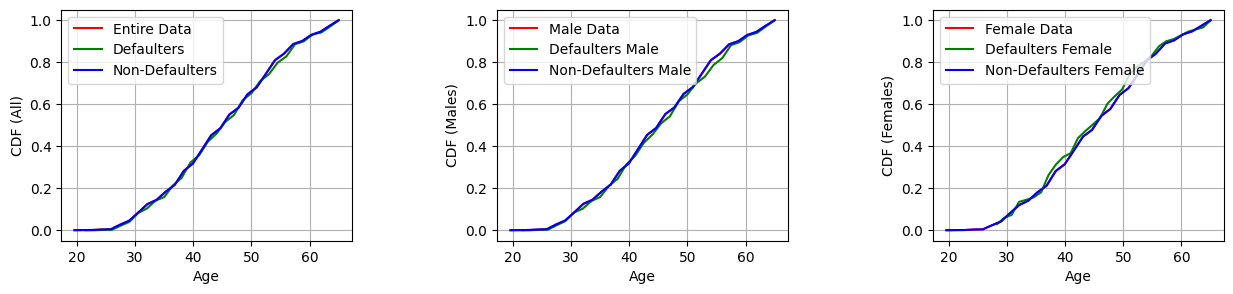

In [327]:
from scipy.stats import cumfreq

fig, axes = plt.subplots(1, 3, figsize=(15, 3))  # Change figure size to (20, 12)
axes.flatten()
# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5, wspace=0.5)

# Define a function to plot CDF
def plot_cdf(data, ax, color, label):
    data_clean = data.dropna()  # Remove NaN values
    counts, bin_edges = np.histogram(data_clean, bins=30)
    cdf = np.cumsum(counts) / np.sum(counts)
    ax.plot(bin_edges[1:], cdf, color=color, label=label)
    ax.set_xlabel('Age')
    ax.set_ylabel('CDF')

# Plotting for the entire dataset
plot_cdf(X_train['age'], axes[0], 'red', 'Entire Data')  
plot_cdf(target_1['age'], axes[0], 'green', 'Defaulters')  
plot_cdf(target_0['age'], axes[0], 'blue', 'Non-Defaulters')  

# Plotting for the entire male dataset
plot_cdf(train_m['age'], axes[1], 'red', 'Male Data')  
plot_cdf(target_1_m['age'], axes[1], 'green', 'Defaulters Male')  
plot_cdf(target_0_m['age'], axes[1], 'blue', 'Non-Defaulters Male')  

# Plotting for the entire female dataset
plot_cdf(train_f['age'], axes[2], 'red', 'Female Data')  
plot_cdf(target_1_f['age'], axes[2], 'green', 'Defaulters Female')  
plot_cdf(target_0_f['age'], axes[2], 'blue', 'Non-Defaulters Female')  

for ax in axes:  # Loop over each subplot
    ax.grid(True)

# Adding legends
for ax in axes:  # Loop over each subplot
    ax.legend()

# Adding labels and title
for i, ax in enumerate(axes):  # Loop over each subplot
    if i == 0:
        ax.set_ylabel('CDF (All)')
    elif i == 1:
        ax.set_ylabel('CDF (Males)')
    elif i == 2:
        ax.set_ylabel('CDF (Females)')
plt.show()

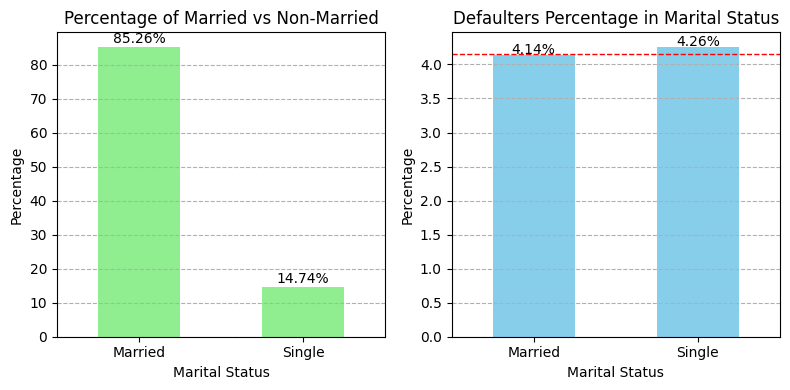

In [328]:
import matplotlib.pyplot as plt

# Calculate defaulters percentage for each category
def calculate_defaulters_percentage(data, category_column, target_column):
    defaulters_percentage = data.groupby(category_column)[target_column].mean() * 100
    return defaulters_percentage

# Plot bar chart for defaulters percentage
def plot_defaulters_bar_chart(data, category_column, target_column):
    defaulters_percentage = calculate_defaulters_percentage(data, category_column, target_column)
    ax = defaulters_percentage.plot(kind='bar', color='skyblue')
    plt.title('Defaulters Percentage in Marital Status')
    plt.xlabel(category_column)
    plt.ylabel('Percentage')
    ax.axhline(4.16, color='red', linestyle='dashed', linewidth=1, label=f'Mode: {4.16:.2f}')
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--')
    # Add percentage labels above the bars
    for i, value in enumerate(defaulters_percentage):
        ax.text(i, value +0.01, f'{value:.2f}%', ha='center')

# Plot bar chart for male vs female percentage
def plot_marital_bar_chart(data, category_column):
    gender_percentage = data[category_column].value_counts(normalize=True) * 100
    ax = gender_percentage.plot(kind='bar', color='lightgreen')
    plt.title('Percentage of Married vs Non-Married')
    plt.xlabel(category_column)
    plt.ylabel('Percentage')
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--')
    # Add percentage labels above the bars
    for i, value in enumerate(gender_percentage):
        ax.text(i, value + 1, f'{value:.2f}%', ha='center')

# Create a figure with 1 row and 2 columns
plt.figure(figsize=(8, 4))

# Plot defaulters bar chart in the first subplot
plt.subplot(1, 2, 1)
plot_marital_bar_chart(X_train, 'Marital Status')

# Plot gender bar chart in the second subplot
plt.subplot(1, 2, 2)
plot_defaulters_bar_chart(X_train, 'Marital Status', 'Performance Tag')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()

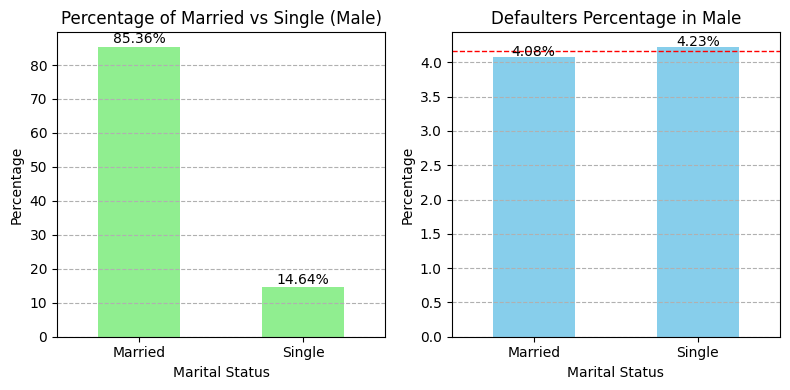

In [329]:
# Males data > Married vs Single. Married Male % Default vs Male Single Default %

# Calculate defaulters percentage for each category
def calculate_defaulters_percentage(data, category_column, target_column):
    defaulters_percentage = data.groupby(category_column)[target_column].mean() * 100
    return defaulters_percentage

# Plot bar chart for defaulters percentage
def plot_defaulters_bar_chart(data, category_column, target_column):
    defaulters_percentage = calculate_defaulters_percentage(data, category_column, target_column)
    ax = defaulters_percentage.plot(kind='bar', color='skyblue')
    plt.title('Defaulters Percentage in Male')
    plt.xlabel(category_column)
    plt.ylabel('Percentage')
    ax.axhline(4.16, color='red', linestyle='dashed', linewidth=1, label=f'Mode: {4.16:.2f}')
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--')
    # Add percentage labels above the bars
    for i, value in enumerate(defaulters_percentage):
        ax.text(i, value +0.01, f'{value:.2f}%', ha='center')

# Plot bar chart for male vs female percentage
def plot_male_marital_bar_chart(data, category_column):
    gender_percentage = data[category_column].value_counts(normalize=True) * 100
    ax = gender_percentage.plot(kind='bar', color='lightgreen')
    plt.title('Percentage of Married vs Single (Male)')
    plt.xlabel(category_column)
    plt.ylabel('Percentage')
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--')
    # Add percentage labels above the bars
    for i, value in enumerate(gender_percentage):
        ax.text(i, value + 1, f'{value:.2f}%', ha='center')

# Create a figure with 1 row and 2 columns
plt.figure(figsize=(8, 4))

# Plot defaulters bar chart in the first subplot
plt.subplot(1, 2, 1)
plot_male_marital_bar_chart(train_m, 'Marital Status')

# Plot gender bar chart in the second subplot
plt.subplot(1, 2, 2)
plot_defaulters_bar_chart(train_m, 'Marital Status', 'Performance Tag')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()

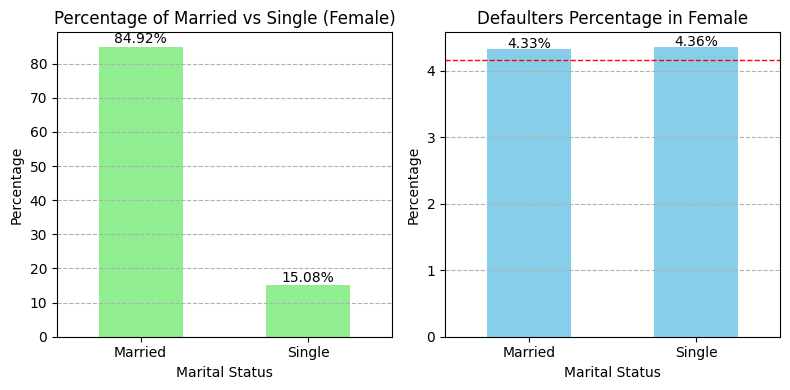

In [330]:
# Males data > Married vs Single. Married Male % Default vs Male Single Default %

# Calculate defaulters percentage for each category
def calculate_defaulters_percentage(data, category_column, target_column):
    defaulters_percentage = data.groupby(category_column)[target_column].mean() * 100
    return defaulters_percentage

# Plot bar chart for defaulters percentage
def plot_defaulters_bar_chart(data, category_column, target_column):
    defaulters_percentage = calculate_defaulters_percentage(data, category_column, target_column)
    ax = defaulters_percentage.plot(kind='bar', color='skyblue')
    plt.title('Defaulters Percentage in Female')
    plt.xlabel(category_column)
    plt.ylabel('Percentage')
    ax.axhline(4.16, color='red', linestyle='dashed', linewidth=1, label=f'Mode: {4.16:.2f}')
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--')
    # Add percentage labels above the bars
    for i, value in enumerate(defaulters_percentage):
        ax.text(i, value +0.01, f'{value:.2f}%', ha='center')

# Plot bar chart for male vs female percentage
def plot_female_marital_bar_chart(data, category_column):
    gender_percentage = data[category_column].value_counts(normalize=True) * 100
    ax = gender_percentage.plot(kind='bar', color='lightgreen')
    plt.title('Percentage of Married vs Single (Female)')
    plt.xlabel(category_column)
    plt.ylabel('Percentage')
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--')
    # Add percentage labels above the bars
    for i, value in enumerate(gender_percentage):
        ax.text(i, value + 1, f'{value:.2f}%', ha='center')

# Create a figure with 1 row and 2 columns
plt.figure(figsize=(8, 4))

# Plot defaulters bar chart in the first subplot
plt.subplot(1, 2, 1)
plot_female_marital_bar_chart(train_f, 'Marital Status')

# Plot gender bar chart in the second subplot
plt.subplot(1, 2, 2)
plot_defaulters_bar_chart(train_f, 'Marital Status', 'Performance Tag')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()

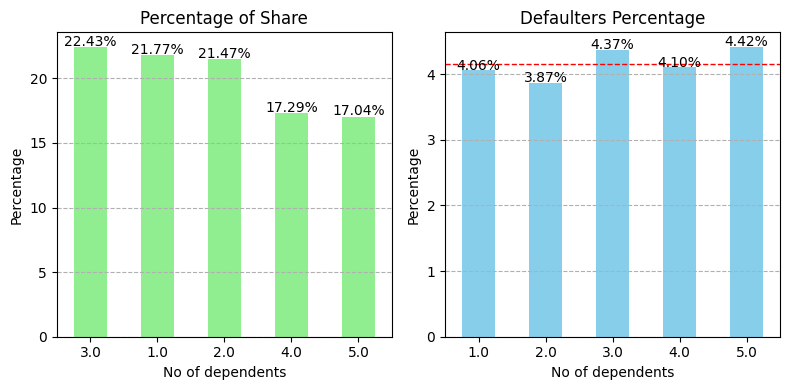

In [331]:
# Males data > Married vs Single. Married Male % Default vs Male Single Default %

# Calculate defaulters percentage for each category
def calculate_defaulters_percentage(data, category_column, target_column):
    defaulters_percentage = data.groupby(category_column)[target_column].mean() * 100
    return defaulters_percentage

# Plot bar chart for defaulters percentage
def plot_defaulters_bar_chart(data, category_column, target_column):
    defaulters_percentage = calculate_defaulters_percentage(data, category_column, target_column)
    ax = defaulters_percentage.plot(kind='bar', color='skyblue')
    plt.title('Defaulters Percentage')
    plt.xlabel(category_column)
    plt.ylabel('Percentage')
    ax.axhline(4.16, color='red', linestyle='dashed', linewidth=1, label=f'Mode: {4.16:.2f}')
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--')
    # Add percentage labels above the bars
    for i, value in enumerate(defaulters_percentage):
        ax.text(i, value +0.01, f'{value:.2f}%', ha='center')

# Plot bar chart for male vs female percentage
def plot_dependent_bar_chart(data, category_column):
    gender_percentage = data[category_column].value_counts(normalize=True) * 100
    ax = gender_percentage.plot(kind='bar', color='lightgreen')
    plt.title('Percentage of Share')
    plt.xlabel(category_column)
    plt.ylabel('Percentage')
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--')
    # Add percentage labels above the bars
    for i, value in enumerate(gender_percentage):
        ax.text(i, value + 0.1, f'{value:.2f}%', ha='center')

# Create a figure with 1 row and 2 columns
plt.figure(figsize=(8, 4))

# Plot defaulters bar chart in the first subplot
plt.subplot(1, 2, 1)
plot_dependent_bar_chart(X_train, 'No of dependents')

# Plot gender bar chart in the second subplot
plt.subplot(1, 2, 2)
plot_defaulters_bar_chart(X_train, 'No of dependents', 'Performance Tag')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()

In [332]:
X_train.Income.value_counts()

Income
4.5     3478
31.0    1025
33.0    1018
35.0    1004
20.0     997
        ... 
60.0     306
4.0       30
3.0       18
1.0       14
2.0        5
Name: count, Length: 61, dtype: int64

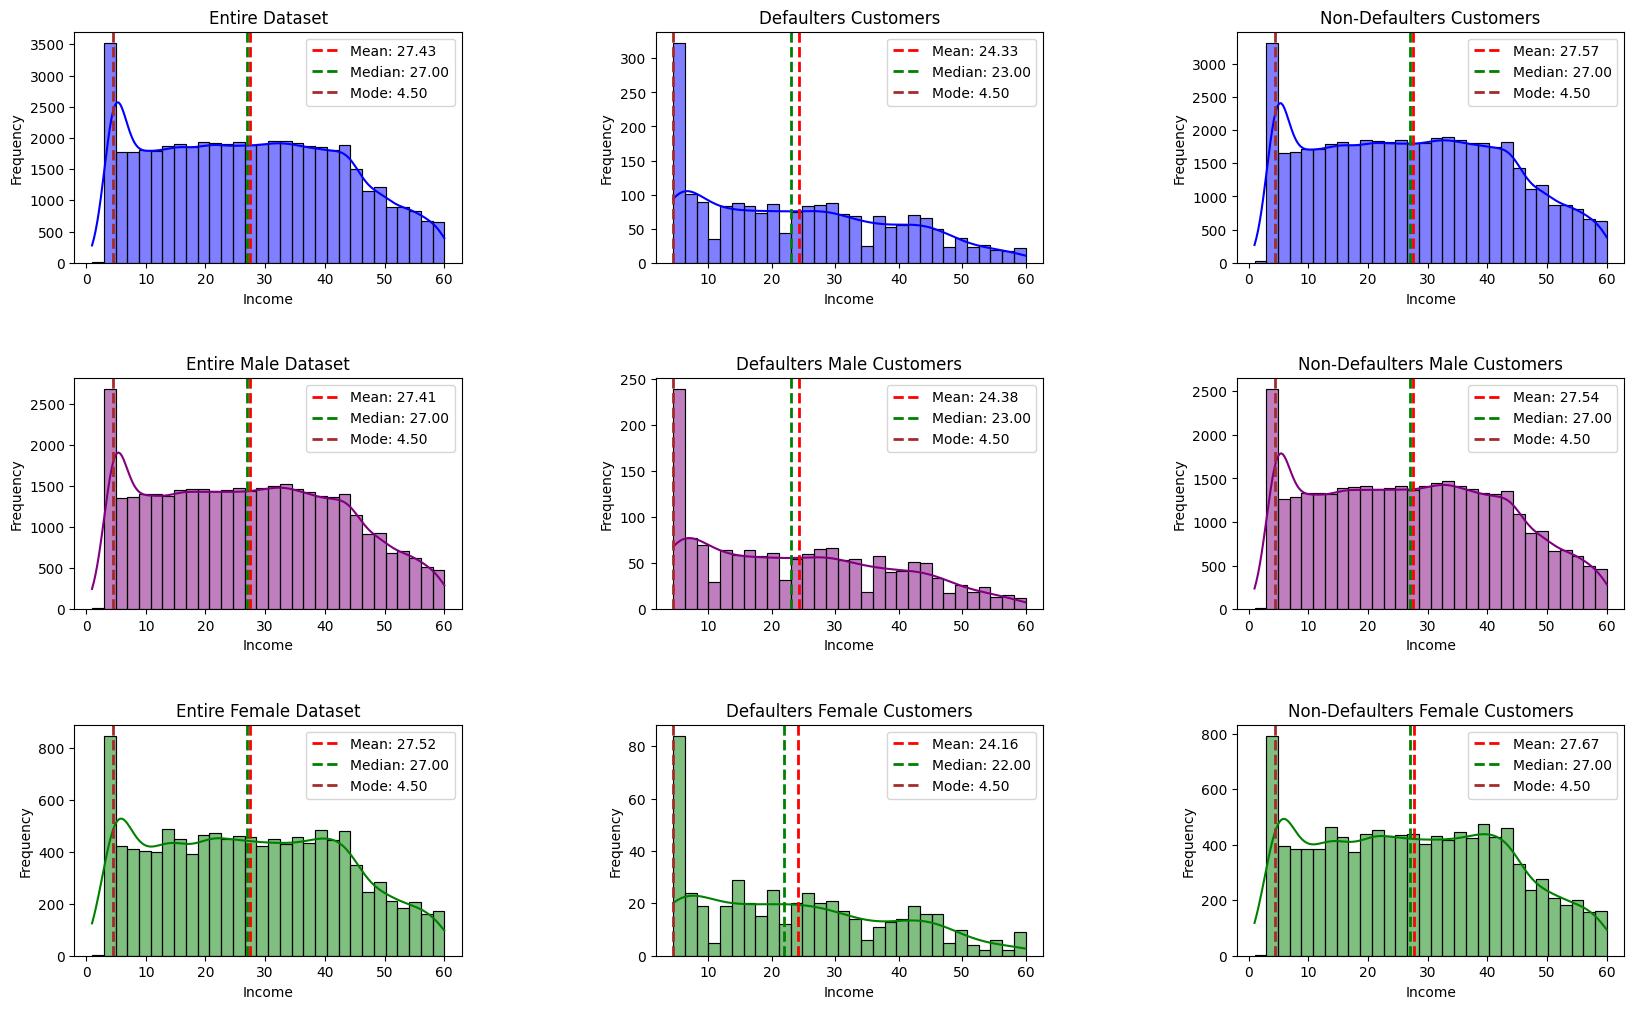

In [333]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the histograms
fig, axes = plt.subplots(3, 3, figsize=(20, 12))  # Change figure size to (20, 12)
axes.flatten()
# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5, wspace=0.5)

# Plotting for the entire dataset
sns.histplot(X_train['Income'].dropna(), bins=30, kde=True, color='blue', ax=axes[0, 0])  # Changed indexing to [0, 0]
mean_Income = np.mean(X_train['Income'].dropna())
median_Income = np.median(X_train['Income'].dropna())
mode_Income = X_train['Income'].mode()[0]
axes[0, 0].axvline(mean_Income, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_Income:.2f}')
axes[0, 0].axvline(median_Income, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_Income:.2f}')
axes[0, 0].axvline(mode_Income, color='brown', linestyle='dashed', linewidth=2, label=f'Mode: {mode_Income:.2f}')
axes[0, 0].set_title('Entire Dataset')

# Plotting for Defaulters Employees
sns.histplot(target_1['Income'].dropna(), bins=30, kde=True, color='blue', ax=axes[0, 1])  # Changed indexing to [0, 1]
mean_Income = np.mean(target_1['Income'].dropna())
median_Income = np.median(target_1['Income'].dropna())
mode_Income = target_1['Income'].mode()[0]
axes[0, 1].axvline(mean_Income, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_Income:.2f}')
axes[0, 1].axvline(median_Income, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_Income:.2f}')
axes[0, 1].axvline(mode_Income, color='brown', linestyle='dashed', linewidth=2, label=f'Mode: {mode_Income:.2f}')
axes[0, 1].set_title('Defaulters Customers')

# Plotting for Non-Defaulters Employees
sns.histplot(target_0['Income'].dropna(), bins=30, kde=True, color='blue', ax=axes[0, 2])  # Changed indexing to [0, 2]
mean_Income = np.mean(target_0['Income'].dropna())
median_Income = np.median(target_0['Income'].dropna())
mode_Income = target_0['Income'].mode()[0]
axes[0, 2].axvline(mean_Income, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_Income:.2f}')
axes[0, 2].axvline(median_Income, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_Income:.2f}')
axes[0, 2].axvline(mode_Income, color='brown', linestyle='dashed', linewidth=2, label=f'Mode: {mode_Income:.2f}')
axes[0, 2].set_title('Non-Defaulters Customers')

# Plotting for the entire dataset
sns.histplot(train_m['Income'].dropna(), bins=30, kde=True, color='purple', ax=axes[1, 0])  # Changed indexing to [1, 0]
mean_Income = np.mean(train_m['Income'].dropna())
median_Income = np.median(train_m['Income'].dropna())
mode_Income = train_m['Income'].mode()[0]
axes[1, 0].axvline(mean_Income, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_Income:.2f}')
axes[1, 0].axvline(median_Income, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_Income:.2f}')
axes[1, 0].axvline(mode_Income, color='brown', linestyle='dashed', linewidth=2, label=f'Mode: {mode_Income:.2f}')
axes[1, 0].set_title('Entire Male Dataset')

# Plotting for Defaulters Employees
sns.histplot(target_1_m['Income'].dropna(), bins=30, kde=True, color='purple', ax=axes[1, 1])  # Changed indexing to [1, 1]
mean_Income = np.mean(target_1_m['Income'].dropna())
median_Income = np.median(target_1_m['Income'].dropna())
mode_Income = target_1['Income'].mode()[0]
axes[1, 1].axvline(mean_Income, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_Income:.2f}')
axes[1, 1].axvline(median_Income, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_Income:.2f}')
axes[1, 1].axvline(mode_Income, color='brown', linestyle='dashed', linewidth=2, label=f'Mode: {mode_Income:.2f}')
axes[1, 1].set_title('Defaulters Male Customers')

# Plotting for Non-Defaulters Employees
sns.histplot(target_0_m['Income'].dropna(), bins=30, kde=True, color='purple', ax=axes[1, 2])  # Changed indexing to [1, 2]
mean_Income = np.mean(target_0_m['Income'].dropna())
median_Income = np.median(target_0_m['Income'].dropna())
mode_Income = target_0['Income'].mode()[0]
axes[1, 2].axvline(mean_Income, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_Income:.2f}')
axes[1, 2].axvline(median_Income, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_Income:.2f}')
axes[1, 2].axvline(mode_Income, color='brown', linestyle='dashed', linewidth=2, label=f'Mode: {mode_Income:.2f}')
axes[1, 2].set_title('Non-Defaulters Male Customers')

# Plotting for the entire dataset
sns.histplot(train_f['Income'].dropna(), bins=30, kde=True, color='green', ax=axes[2, 0])  # Changed indexing to [2, 0]
mean_Income = np.mean(train_f['Income'].dropna())
median_Income = np.median(train_f['Income'].dropna())
mode_Income = train_m['Income'].mode()[0]
axes[2, 0].axvline(mean_Income, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_Income:.2f}')
axes[2, 0].axvline(median_Income, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_Income:.2f}')
axes[2, 0].axvline(mode_Income, color='brown', linestyle='dashed', linewidth=2, label=f'Mode: {mode_Income:.2f}')
axes[2, 0].set_title('Entire Female Dataset')

# Plotting for Defaulters Employees
sns.histplot(target_1_f['Income'].dropna(), bins=30, kde=True, color='green', ax=axes[2, 1])  # Changed indexing to [2, 1]
mean_Income = np.mean(target_1_f['Income'].dropna())
median_Income = np.median(target_1_f['Income'].dropna())
mode_Income = target_1['Income'].mode()[0]
axes[2, 1].axvline(mean_Income, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_Income:.2f}')
axes[2, 1].axvline(median_Income, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_Income:.2f}')
axes[2, 1].axvline(mode_Income, color='brown', linestyle='dashed', linewidth=2, label=f'Mode: {mode_Income:.2f}')
axes[2, 1].set_title('Defaulters Female Customers')

# Plotting for Non-Defaulters Employees
sns.histplot(target_0_f['Income'].dropna(), bins=30, kde=True, color='green', ax=axes[2, 2])  # Changed indexing to [2, 2]
mean_Income = np.mean(target_0_f['Income'].dropna())
median_Income = np.median(target_0_f['Income'].dropna())
mode_Income = target_0['Income'].mode()[0]
axes[2, 2].axvline(mean_Income, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_Income:.2f}')
axes[2, 2].axvline(median_Income, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_Income:.2f}')
axes[2, 2].axvline(mode_Income, color='brown', linestyle='dashed', linewidth=2, label=f'Mode: {mode_Income:.2f}')
axes[2, 2].set_title('Non-Defaulters Female Customers')

# Adding labels and title
for ax_row in axes:  # Loop over each row of subplots
    for ax in ax_row:  # Loop over each subplot in the row
        ax.set_xlabel('Income')
        ax.set_ylabel('Frequency')
        ax.legend()
plt.show()


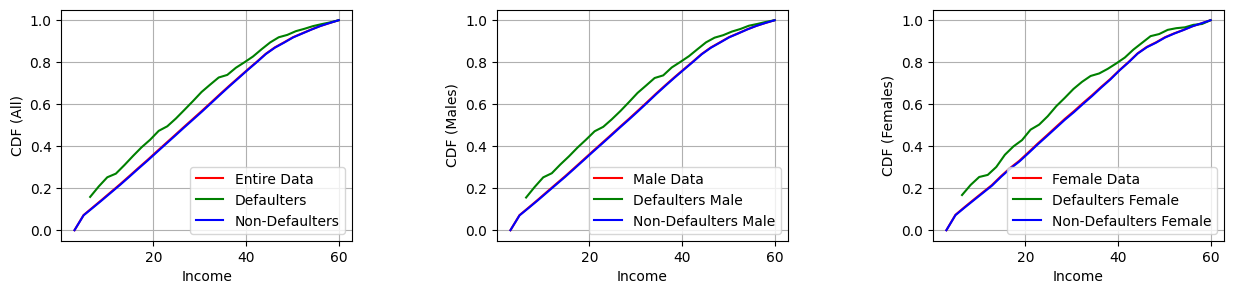

In [334]:
from scipy.stats import cumfreq

fig, axes = plt.subplots(1, 3, figsize=(15, 3))  # Change figure size to (20, 12)
axes.flatten()
# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5, wspace=0.5)

# Define a function to plot CDF
def plot_cdf(data, ax, color, label):
    data_clean = data.dropna()  # Remove NaN values
    counts, bin_edges = np.histogram(data_clean, bins=30)
    cdf = np.cumsum(counts) / np.sum(counts)
    ax.plot(bin_edges[1:], cdf, color=color, label=label)
    ax.set_xlabel('Income')
    ax.set_ylabel('CDF')

# Plotting for the entire dataset
plot_cdf(X_train['Income'], axes[0], 'red', 'Entire Data')  
plot_cdf(target_1['Income'], axes[0], 'green', 'Defaulters')  
plot_cdf(target_0['Income'], axes[0], 'blue', 'Non-Defaulters')  

# Plotting for the entire male dataset
plot_cdf(train_m['Income'], axes[1], 'red', 'Male Data')  
plot_cdf(target_1_m['Income'], axes[1], 'green', 'Defaulters Male')  
plot_cdf(target_0_m['Income'], axes[1], 'blue', 'Non-Defaulters Male')  

# Plotting for the entire female dataset
plot_cdf(train_f['Income'], axes[2], 'red', 'Female Data')  
plot_cdf(target_1_f['Income'], axes[2], 'green', 'Defaulters Female')  
plot_cdf(target_0_f['Income'], axes[2], 'blue', 'Non-Defaulters Female')  

for ax in axes:  # Loop over each subplot
    ax.grid(True)

# Adding legends
for ax in axes:  # Loop over each subplot
    ax.legend()

# Adding labels and title
for i, ax in enumerate(axes):  # Loop over each subplot
    if i == 0:
        ax.set_ylabel('CDF (All)')
    elif i == 1:
        ax.set_ylabel('CDF (Males)')
    elif i == 2:
        ax.set_ylabel('CDF (Females)')
plt.show()

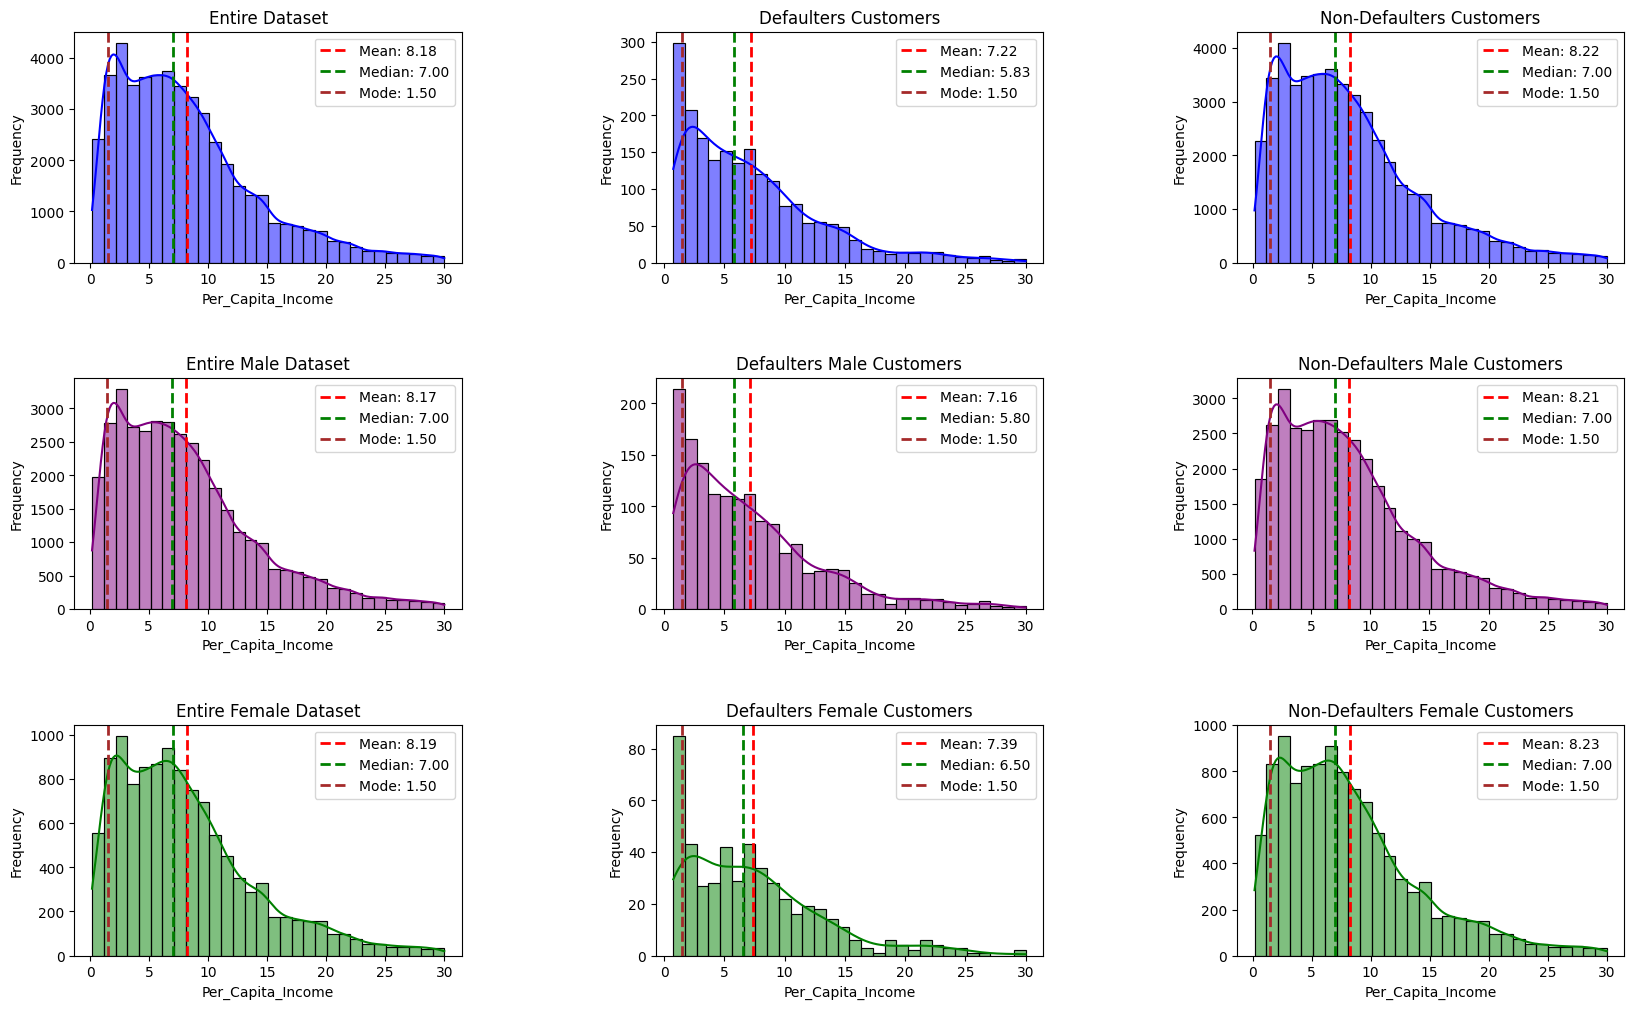

In [335]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the histograms
fig, axes = plt.subplots(3, 3, figsize=(20, 12))  # Change figure size to (20, 12)
axes.flatten()
# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5, wspace=0.5)

# Plotting for the entire dataset
sns.histplot(X_train['Per_Capita_Income'].dropna(), bins=30, kde=True, color='blue', ax=axes[0, 0])  # Changed indexing to [0, 0]
mean_Per_Capita_Income = np.mean(X_train['Per_Capita_Income'].dropna())
median_Per_Capita_Income = np.median(X_train['Per_Capita_Income'].dropna())
mode_Per_Capita_Income = X_train['Per_Capita_Income'].mode()[0]
axes[0, 0].axvline(mean_Per_Capita_Income, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_Per_Capita_Income:.2f}')
axes[0, 0].axvline(median_Per_Capita_Income, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_Per_Capita_Income:.2f}')
axes[0, 0].axvline(mode_Per_Capita_Income, color='brown', linestyle='dashed', linewidth=2, label=f'Mode: {mode_Per_Capita_Income:.2f}')
axes[0, 0].set_title('Entire Dataset')

# Plotting for Defaulters Employees
sns.histplot(target_1['Per_Capita_Income'].dropna(), bins=30, kde=True, color='blue', ax=axes[0, 1])  # Changed indexing to [0, 1]
mean_Per_Capita_Income = np.mean(target_1['Per_Capita_Income'].dropna())
median_Per_Capita_Income = np.median(target_1['Per_Capita_Income'].dropna())
mode_Per_Capita_Income = target_1['Per_Capita_Income'].mode()[0]
axes[0, 1].axvline(mean_Per_Capita_Income, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_Per_Capita_Income:.2f}')
axes[0, 1].axvline(median_Per_Capita_Income, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_Per_Capita_Income:.2f}')
axes[0, 1].axvline(mode_Per_Capita_Income, color='brown', linestyle='dashed', linewidth=2, label=f'Mode: {mode_Per_Capita_Income:.2f}')
axes[0, 1].set_title('Defaulters Customers')

# Plotting for Non-Defaulters Employees
sns.histplot(target_0['Per_Capita_Income'].dropna(), bins=30, kde=True, color='blue', ax=axes[0, 2])  # Changed indexing to [0, 2]
mean_Per_Capita_Income = np.mean(target_0['Per_Capita_Income'].dropna())
median_Per_Capita_Income = np.median(target_0['Per_Capita_Income'].dropna())
mode_Per_Capita_Income = target_0['Per_Capita_Income'].mode()[0]
axes[0, 2].axvline(mean_Per_Capita_Income, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_Per_Capita_Income:.2f}')
axes[0, 2].axvline(median_Per_Capita_Income, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_Per_Capita_Income:.2f}')
axes[0, 2].axvline(mode_Per_Capita_Income, color='brown', linestyle='dashed', linewidth=2, label=f'Mode: {mode_Per_Capita_Income:.2f}')
axes[0, 2].set_title('Non-Defaulters Customers')

# Plotting for the entire dataset
sns.histplot(train_m['Per_Capita_Income'].dropna(), bins=30, kde=True, color='purple', ax=axes[1, 0])  # Changed indexing to [1, 0]
mean_Per_Capita_Income = np.mean(train_m['Per_Capita_Income'].dropna())
median_Per_Capita_Income = np.median(train_m['Per_Capita_Income'].dropna())
mode_Per_Capita_Income = train_m['Per_Capita_Income'].mode()[0]
axes[1, 0].axvline(mean_Per_Capita_Income, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_Per_Capita_Income:.2f}')
axes[1, 0].axvline(median_Per_Capita_Income, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_Per_Capita_Income:.2f}')
axes[1, 0].axvline(mode_Per_Capita_Income, color='brown', linestyle='dashed', linewidth=2, label=f'Mode: {mode_Per_Capita_Income:.2f}')
axes[1, 0].set_title('Entire Male Dataset')

# Plotting for Defaulters Employees
sns.histplot(target_1_m['Per_Capita_Income'].dropna(), bins=30, kde=True, color='purple', ax=axes[1, 1])  # Changed indexing to [1, 1]
mean_Per_Capita_Income = np.mean(target_1_m['Per_Capita_Income'].dropna())
median_Per_Capita_Income = np.median(target_1_m['Per_Capita_Income'].dropna())
mode_Per_Capita_Income = target_1['Per_Capita_Income'].mode()[0]
axes[1, 1].axvline(mean_Per_Capita_Income, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_Per_Capita_Income:.2f}')
axes[1, 1].axvline(median_Per_Capita_Income, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_Per_Capita_Income:.2f}')
axes[1, 1].axvline(mode_Per_Capita_Income, color='brown', linestyle='dashed', linewidth=2, label=f'Mode: {mode_Per_Capita_Income:.2f}')
axes[1, 1].set_title('Defaulters Male Customers')

# Plotting for Non-Defaulters Employees
sns.histplot(target_0_m['Per_Capita_Income'].dropna(), bins=30, kde=True, color='purple', ax=axes[1, 2])  # Changed indexing to [1, 2]
mean_Per_Capita_Income = np.mean(target_0_m['Per_Capita_Income'].dropna())
median_Per_Capita_Income = np.median(target_0_m['Per_Capita_Income'].dropna())
mode_Per_Capita_Income = target_0['Per_Capita_Income'].mode()[0]
axes[1, 2].axvline(mean_Per_Capita_Income, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_Per_Capita_Income:.2f}')
axes[1, 2].axvline(median_Per_Capita_Income, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_Per_Capita_Income:.2f}')
axes[1, 2].axvline(mode_Per_Capita_Income, color='brown', linestyle='dashed', linewidth=2, label=f'Mode: {mode_Per_Capita_Income:.2f}')
axes[1, 2].set_title('Non-Defaulters Male Customers')

# Plotting for the entire dataset
sns.histplot(train_f['Per_Capita_Income'].dropna(), bins=30, kde=True, color='green', ax=axes[2, 0])  # Changed indexing to [2, 0]
mean_Per_Capita_Income = np.mean(train_f['Per_Capita_Income'].dropna())
median_Per_Capita_Income = np.median(train_f['Per_Capita_Income'].dropna())
mode_Per_Capita_Income = train_m['Per_Capita_Income'].mode()[0]
axes[2, 0].axvline(mean_Per_Capita_Income, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_Per_Capita_Income:.2f}')
axes[2, 0].axvline(median_Per_Capita_Income, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_Per_Capita_Income:.2f}')
axes[2, 0].axvline(mode_Per_Capita_Income, color='brown', linestyle='dashed', linewidth=2, label=f'Mode: {mode_Per_Capita_Income:.2f}')
axes[2, 0].set_title('Entire Female Dataset')

# Plotting for Defaulters Employees
sns.histplot(target_1_f['Per_Capita_Income'].dropna(), bins=30, kde=True, color='green', ax=axes[2, 1])  # Changed indexing to [2, 1]
mean_Per_Capita_Income = np.mean(target_1_f['Per_Capita_Income'].dropna())
median_Per_Capita_Income = np.median(target_1_f['Per_Capita_Income'].dropna())
mode_Per_Capita_Income = target_1['Per_Capita_Income'].mode()[0]
axes[2, 1].axvline(mean_Per_Capita_Income, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_Per_Capita_Income:.2f}')
axes[2, 1].axvline(median_Per_Capita_Income, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_Per_Capita_Income:.2f}')
axes[2, 1].axvline(mode_Per_Capita_Income, color='brown', linestyle='dashed', linewidth=2, label=f'Mode: {mode_Per_Capita_Income:.2f}')
axes[2, 1].set_title('Defaulters Female Customers')

# Plotting for Non-Defaulters Employees
sns.histplot(target_0_f['Per_Capita_Income'].dropna(), bins=30, kde=True, color='green', ax=axes[2, 2])  # Changed indexing to [2, 2]
mean_Per_Capita_Income = np.mean(target_0_f['Per_Capita_Income'].dropna())
median_Per_Capita_Income = np.median(target_0_f['Per_Capita_Income'].dropna())
mode_Per_Capita_Income = target_0['Per_Capita_Income'].mode()[0]
axes[2, 2].axvline(mean_Per_Capita_Income, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_Per_Capita_Income:.2f}')
axes[2, 2].axvline(median_Per_Capita_Income, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_Per_Capita_Income:.2f}')
axes[2, 2].axvline(mode_Per_Capita_Income, color='brown', linestyle='dashed', linewidth=2, label=f'Mode: {mode_Per_Capita_Income:.2f}')
axes[2, 2].set_title('Non-Defaulters Female Customers')

# Adding labels and title
for ax_row in axes:  # Loop over each row of subplots
    for ax in ax_row:  # Loop over each subplot in the row
        ax.set_xlabel('Per_Capita_Income')
        ax.set_ylabel('Frequency')
        ax.legend()
plt.show()

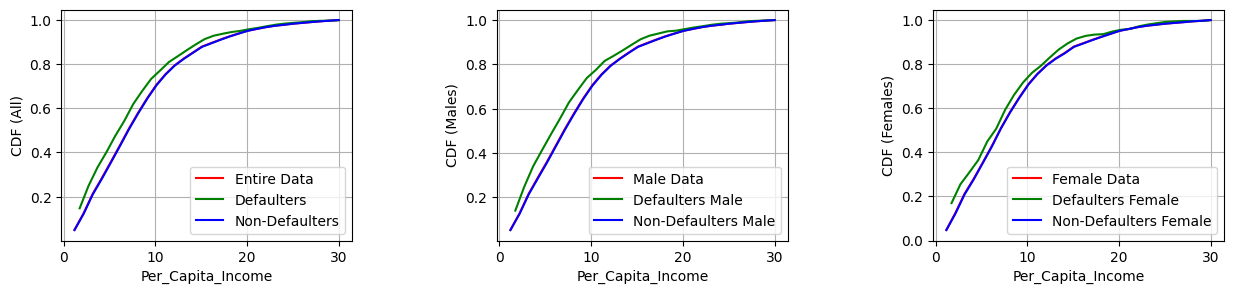

In [336]:
from scipy.stats import cumfreq

fig, axes = plt.subplots(1, 3, figsize=(15, 3))  # Change figure size to (20, 12)
axes.flatten()
# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5, wspace=0.5)

# Define a function to plot CDF
def plot_cdf(data, ax, color, label):
    data_clean = data.dropna()  # Remove NaN values
    counts, bin_edges = np.histogram(data_clean, bins=30)
    cdf = np.cumsum(counts) / np.sum(counts)
    ax.plot(bin_edges[1:], cdf, color=color, label=label)
    ax.set_xlabel('Per_Capita_Income')
    ax.set_ylabel('CDF')

# Plotting for the entire dataset
plot_cdf(X_train['Per_Capita_Income'], axes[0], 'red', 'Entire Data')  
plot_cdf(target_1['Per_Capita_Income'], axes[0], 'green', 'Defaulters')  
plot_cdf(target_0['Per_Capita_Income'], axes[0], 'blue', 'Non-Defaulters')  

# Plotting for the entire male dataset
plot_cdf(train_m['Per_Capita_Income'], axes[1], 'red', 'Male Data')  
plot_cdf(target_1_m['Per_Capita_Income'], axes[1], 'green', 'Defaulters Male')  
plot_cdf(target_0_m['Per_Capita_Income'], axes[1], 'blue', 'Non-Defaulters Male')  

# Plotting for the entire female dataset
plot_cdf(train_f['Per_Capita_Income'], axes[2], 'red', 'Female Data')  
plot_cdf(target_1_f['Per_Capita_Income'], axes[2], 'green', 'Defaulters Female')  
plot_cdf(target_0_f['Per_Capita_Income'], axes[2], 'blue', 'Non-Defaulters Female')  

for ax in axes:  # Loop over each subplot
    ax.grid(True)

# Adding legends
for ax in axes:  # Loop over each subplot
    ax.legend()

# Adding labels and title
for i, ax in enumerate(axes):  # Loop over each subplot
    if i == 0:
        ax.set_ylabel('CDF (All)')
    elif i == 1:
        ax.set_ylabel('CDF (Males)')
    elif i == 2:
        ax.set_ylabel('CDF (Females)')
plt.show()

In [337]:
X_train.isna().sum()

Application ID                        0
age                                  46
gender                                2
Marital Status                        4
No of dependents                      3
Income                               76
Education                            85
Profession                           12
Type of residence                     5
No of months in current residence     0
No of months in current company       0
Performance Tag                       0
Per_Capita_Income                    79
dtype: int64

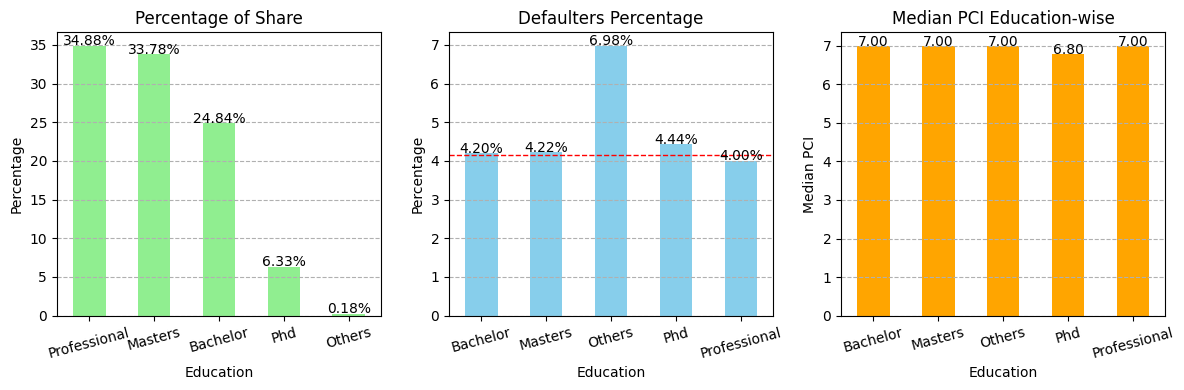

In [338]:
# Males data > Married vs Single. Married Male % Default vs Male Single Default %

# Calculate defaulters percentage for each category
def calculate_defaulters_percentage(data, category_column, target_column):
    defaulters_percentage = data.groupby(category_column)[target_column].mean() * 100
    return defaulters_percentage

# Plot bar chart for defaulters percentage
def plot_defaulters_bar_chart(data, category_column, target_column):
    defaulters_percentage = calculate_defaulters_percentage(data, category_column, target_column)
    ax = defaulters_percentage.plot(kind='bar', color='skyblue')
    plt.title('Defaulters Percentage')
    plt.xlabel(category_column)
    plt.ylabel('Percentage')
    ax.axhline(4.16, color='red', linestyle='dashed', linewidth=1, label=f'Mode: {4.16:.2f}')
    plt.xticks(rotation=15)
    plt.grid(axis='y', linestyle='--')
    # Add percentage labels above the bars
    for i, value in enumerate(defaulters_percentage):
        ax.text(i, value +0.01, f'{value:.2f}%', ha='center')

# Plot bar chart for male vs female percentage
def plot_dependent_bar_chart(data, category_column):
    gender_percentage = data[category_column].value_counts(normalize=True) * 100
    ax = gender_percentage.plot(kind='bar', color='lightgreen')
    plt.title('Percentage of Share')
    plt.xlabel(category_column)
    plt.ylabel('Percentage')
    plt.xticks(rotation=15)
    plt.grid(axis='y', linestyle='--')
    # Add percentage labels above the bars
    for i, value in enumerate(gender_percentage):
        ax.text(i, value + 0.1, f'{value:.2f}%', ha='center')

def plot_median_PCI(data, category_column, target_column):
    median_PCI = data.groupby(category_column)['Per_Capita_Income'].median()
    ax = median_PCI.plot(kind='bar', color='orange')
    plt.title('Median PCI Education-wise')
    plt.xlabel(category_column)
    plt.ylabel('Median PCI')
    plt.xticks(rotation=15)
    plt.grid(axis='y', linestyle='--')
    # Add median PCI labels above the bars
    for i, value in enumerate(median_PCI):
        ax.text(i, value , f'{value:.2f}', ha='center')

# Create a figure with 1 row and 2 columns
plt.figure(figsize=(12, 4))

# Plot defaulters bar chart in the first subplot
plt.subplot(1, 3, 1)
plot_dependent_bar_chart(X_train, 'Education')

# Plot gender bar chart in the second subplot
plt.subplot(1, 3, 2)
plot_defaulters_bar_chart(X_train, 'Education', 'Performance Tag')

plt.subplot(1, 3, 3)
plot_median_PCI(X_train, 'Education', 'Performance Tag')


# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()

Above graph shows that following are the top 3 categories for Education:

1. Bachelor
2. Professional
3. Masters

Few people have done their phd, rest of the population belongs to others or unknown 

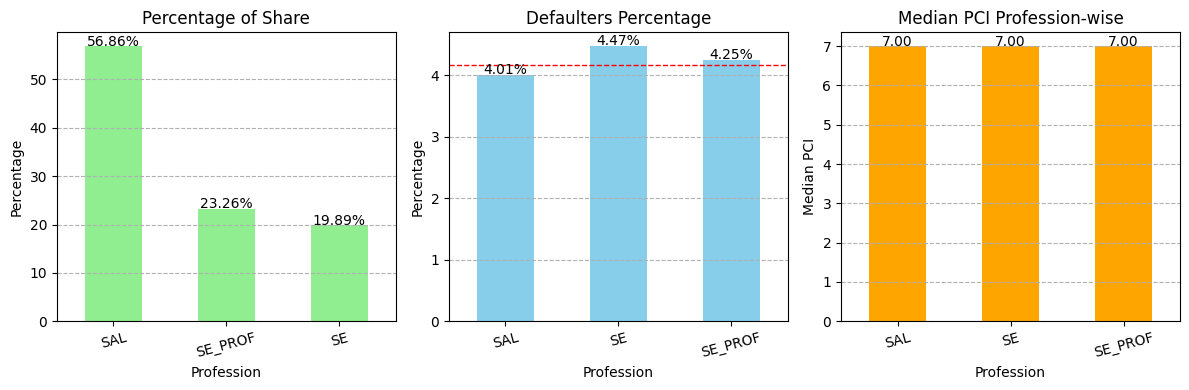

In [339]:
# Males data > Married vs Single. Married Male % Default vs Male Single Default %

# Calculate defaulters percentage for each category
def calculate_defaulters_percentage(data, category_column, target_column):
    defaulters_percentage = data.groupby(category_column)[target_column].mean() * 100
    return defaulters_percentage

# Plot bar chart for defaulters percentage
def plot_defaulters_bar_chart(data, category_column, target_column):
    defaulters_percentage = calculate_defaulters_percentage(data, category_column, target_column)
    ax = defaulters_percentage.plot(kind='bar', color='skyblue')
    plt.title('Defaulters Percentage')
    plt.xlabel(category_column)
    plt.ylabel('Percentage')
    ax.axhline(4.16, color='red', linestyle='dashed', linewidth=1, label=f'Mode: {4.16:.2f}')
    plt.xticks(rotation=15)
    plt.grid(axis='y', linestyle='--')
    # Add percentage labels above the bars
    for i, value in enumerate(defaulters_percentage):
        ax.text(i, value +0.01, f'{value:.2f}%', ha='center')

# Plot bar chart for male vs female percentage
def plot_dependent_bar_chart(data, category_column):
    gender_percentage = data[category_column].value_counts(normalize=True) * 100
    ax = gender_percentage.plot(kind='bar', color='lightgreen')
    plt.title('Percentage of Share')
    plt.xlabel(category_column)
    plt.ylabel('Percentage')
    plt.xticks(rotation=15)
    plt.grid(axis='y', linestyle='--')
    # Add percentage labels above the bars
    for i, value in enumerate(gender_percentage):
        ax.text(i, value + 0.1, f'{value:.2f}%', ha='center')

def plot_median_PCI(data, category_column, target_column):
    median_PCI = data.groupby(category_column)['Per_Capita_Income'].median()
    ax = median_PCI.plot(kind='bar', color='orange')
    plt.title('Median PCI Profession-wise')
    plt.xlabel(category_column)
    plt.ylabel('Median PCI')
    plt.xticks(rotation=15)
    plt.grid(axis='y', linestyle='--')
    # Add median PCI labels above the bars
    for i, value in enumerate(median_PCI):
        ax.text(i, value , f'{value:.2f}', ha='center')

# Create a figure with 1 row and 2 columns
plt.figure(figsize=(12, 4))

# Plot defaulters bar chart in the first subplot
plt.subplot(1, 3, 1)
plot_dependent_bar_chart(X_train, 'Profession')

# Plot gender bar chart in the second subplot
plt.subplot(1, 3, 2)
plot_defaulters_bar_chart(X_train, 'Profession', 'Performance Tag')

plt.subplot(1, 3, 3)
plot_median_PCI(X_train, 'Profession', 'Performance Tag')


# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()

Above graph shows most of the people are Salaried employees

In [340]:
X_train.columns

Index(['Application ID', 'age', 'gender', 'Marital Status', 'No of dependents',
       'Income', 'Education', 'Profession', 'Type of residence',
       'No of months in current residence', 'No of months in current company',
       'Performance Tag', 'Per_Capita_Income'],
      dtype='object')

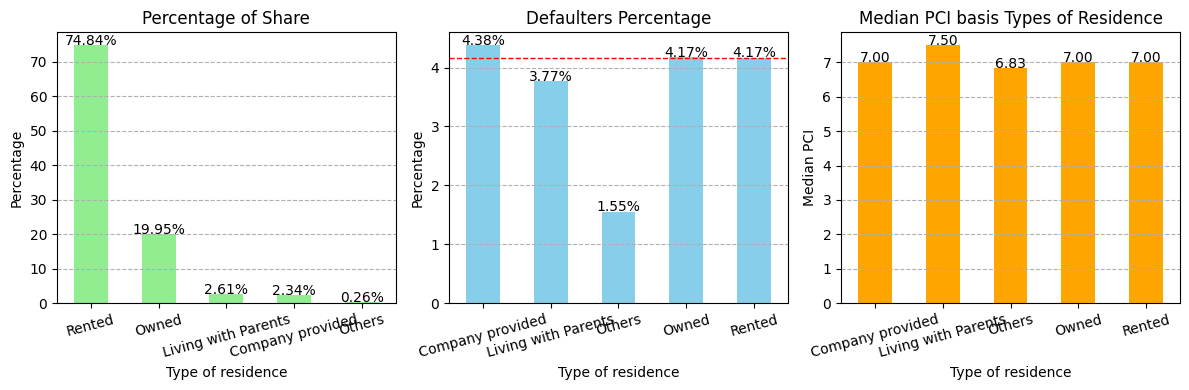

In [341]:
# Males data > Married vs Single. Married Male % Default vs Male Single Default %

# Calculate defaulters percentage for each category
def calculate_defaulters_percentage(data, category_column, target_column):
    defaulters_percentage = data.groupby(category_column)[target_column].mean() * 100
    return defaulters_percentage

# Plot bar chart for defaulters percentage
def plot_defaulters_bar_chart(data, category_column, target_column):
    defaulters_percentage = calculate_defaulters_percentage(data, category_column, target_column)
    ax = defaulters_percentage.plot(kind='bar', color='skyblue')
    plt.title('Defaulters Percentage')
    plt.xlabel(category_column)
    plt.ylabel('Percentage')
    ax.axhline(4.16, color='red', linestyle='dashed', linewidth=1, label=f'Mode: {4.16:.2f}')
    plt.xticks(rotation=15)
    plt.grid(axis='y', linestyle='--')
    # Add percentage labels above the bars
    for i, value in enumerate(defaulters_percentage):
        ax.text(i, value +0.01, f'{value:.2f}%', ha='center')

# Plot bar chart for male vs female percentage
def plot_dependent_bar_chart(data, category_column):
    gender_percentage = data[category_column].value_counts(normalize=True) * 100
    ax = gender_percentage.plot(kind='bar', color='lightgreen')
    plt.title('Percentage of Share')
    plt.xlabel(category_column)
    plt.ylabel('Percentage')
    plt.xticks(rotation=15)
    plt.grid(axis='y', linestyle='--')
    # Add percentage labels above the bars
    for i, value in enumerate(gender_percentage):
        ax.text(i, value + 0.1, f'{value:.2f}%', ha='center')

def plot_median_PCI(data, category_column, target_column):
    median_PCI = data.groupby(category_column)['Per_Capita_Income'].median()
    ax = median_PCI.plot(kind='bar', color='orange')
    plt.title('Median PCI basis Types of Residence')
    plt.xlabel(category_column)
    plt.ylabel('Median PCI')
    plt.xticks(rotation=15)
    plt.grid(axis='y', linestyle='--')
    # Add median PCI labels above the bars
    for i, value in enumerate(median_PCI):
        ax.text(i, value , f'{value:.2f}', ha='center')

# Create a figure with 1 row and 2 columns
plt.figure(figsize=(12, 4))

# Plot defaulters bar chart in the first subplot
plt.subplot(1, 3, 1)
plot_dependent_bar_chart(X_train, 'Type of residence')

# Plot gender bar chart in the second subplot
plt.subplot(1, 3, 2)
plot_defaulters_bar_chart(X_train, 'Type of residence', 'Performance Tag')

plt.subplot(1, 3, 3)
plot_median_PCI(X_train, 'Type of residence', 'Performance Tag')


# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()

Above graph shows most of the people lives in Rented houses, followed by houses owned by them.

In [342]:
X_train["No of years in current residence"] = X_train["No of months in current residence"] // 12
X_train["No of years in current company"] = X_train["No of months in current company"] // 12

The univariate analysis for the Months in Current Residence shows that relatively very high frequency of the population for the 6 to 21 months

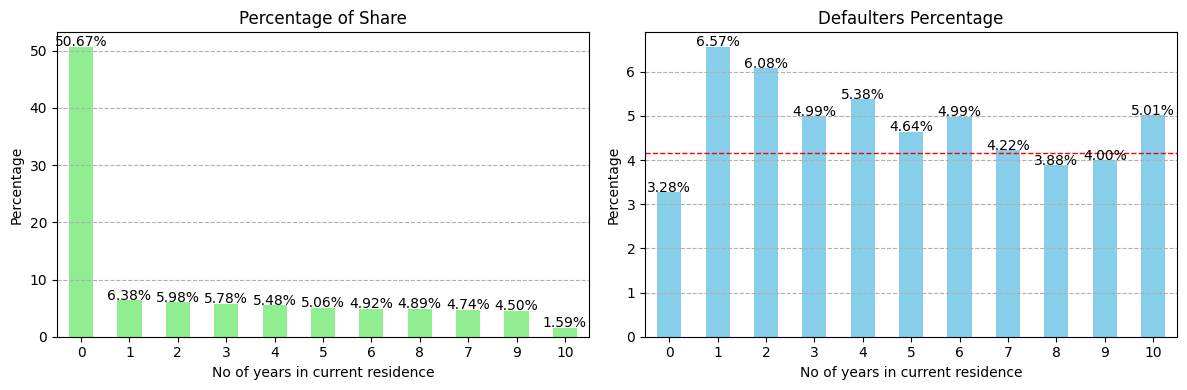

In [343]:
# Males data > Married vs Single. Married Male % Default vs Male Single Default %

# Calculate defaulters percentage for each category
def calculate_defaulters_percentage(data, category_column, target_column):
    defaulters_percentage = data.groupby(category_column)[target_column].mean() * 100
    return defaulters_percentage

# Plot bar chart for defaulters percentage
def plot_defaulters_bar_chart(data, category_column, target_column):
    defaulters_percentage = calculate_defaulters_percentage(data, category_column, target_column)
    ax = defaulters_percentage.plot(kind='bar', color='skyblue')
    plt.title('Defaulters Percentage')
    plt.xlabel(category_column)
    plt.ylabel('Percentage')
    ax.axhline(4.16, color='red', linestyle='dashed', linewidth=1, label=f'Mode: {4.16:.2f}')
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--')
    # Add percentage labels above the bars
    for i, value in enumerate(defaulters_percentage):
        ax.text(i, value +0.01, f'{value:.2f}%', ha='center')

# Plot bar chart for male vs female percentage
def plot_dependent_bar_chart(data, category_column):
    gender_percentage = data[category_column].value_counts(normalize=True) * 100
    ax = gender_percentage.plot(kind='bar', color='lightgreen')
    plt.title('Percentage of Share')
    plt.xlabel(category_column)
    plt.ylabel('Percentage')
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--')
    # Add percentage labels above the bars
    for i, value in enumerate(gender_percentage):
        ax.text(i, value + 0.1, f'{value:.2f}%', ha='center')

# Create a figure with 1 row and 2 columns
plt.figure(figsize=(12, 4))

# Plot defaulters bar chart in the first subplot
plt.subplot(1, 2, 1)
plot_dependent_bar_chart(X_train, 'No of years in current residence')

# Plot gender bar chart in the second subplot
plt.subplot(1, 2, 2)
plot_defaulters_bar_chart(X_train, 'No of years in current residence', 'Performance Tag')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()

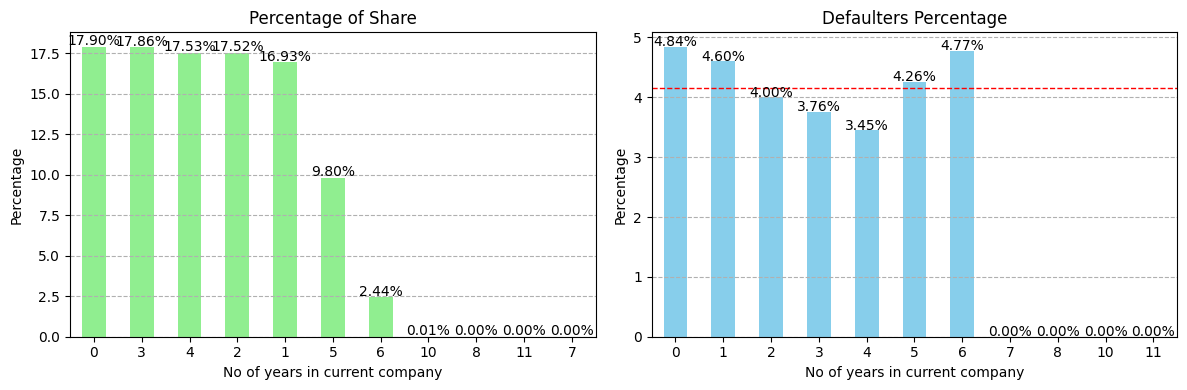

In [344]:
# Males data > Married vs Single. Married Male % Default vs Male Single Default %

# Calculate defaulters percentage for each category
def calculate_defaulters_percentage(data, category_column, target_column):
    defaulters_percentage = data.groupby(category_column)[target_column].mean() * 100
    return defaulters_percentage

# Plot bar chart for defaulters percentage
def plot_defaulters_bar_chart(data, category_column, target_column):
    defaulters_percentage = calculate_defaulters_percentage(data, category_column, target_column)
    ax = defaulters_percentage.plot(kind='bar', color='skyblue')
    plt.title('Defaulters Percentage')
    plt.xlabel(category_column)
    plt.ylabel('Percentage')
    ax.axhline(4.16, color='red', linestyle='dashed', linewidth=1, label=f'Mode: {4.16:.2f}')
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--')
    # Add percentage labels above the bars
    for i, value in enumerate(defaulters_percentage):
        ax.text(i, value +0.01, f'{value:.2f}%', ha='center')

# Plot bar chart for male vs female percentage
def plot_dependent_bar_chart(data, category_column):
    gender_percentage = data[category_column].value_counts(normalize=True) * 100
    ax = gender_percentage.plot(kind='bar', color='lightgreen')
    plt.title('Percentage of Share')
    plt.xlabel(category_column)
    plt.ylabel('Percentage')
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--')
    # Add percentage labels above the bars
    for i, value in enumerate(gender_percentage):
        ax.text(i, value + 0.1, f'{value:.2f}%', ha='center')

# Create a figure with 1 row and 2 columns
plt.figure(figsize=(12, 4))

# Plot defaulters bar chart in the first subplot
plt.subplot(1, 2, 1)
plot_dependent_bar_chart(X_train, 'No of years in current company')

# Plot gender bar chart in the second subplot
plt.subplot(1, 2, 2)
plot_defaulters_bar_chart(X_train, 'No of years in current company', 'Performance Tag')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()

In [345]:
# Missing Value Imputation
(X_train.isna().sum()/X_train.shape[0])*100

Application ID                       0.000000
age                                  0.094052
gender                               0.004089
Marital Status                       0.008178
No of dependents                     0.006134
Income                               0.155391
Education                            0.173792
Profession                           0.024535
Type of residence                    0.010223
No of months in current residence    0.000000
No of months in current company      0.000000
Performance Tag                      0.000000
Per_Capita_Income                    0.161524
No of years in current residence     0.000000
No of years in current company       0.000000
dtype: float64

In [346]:
X_train.Education.value_counts(normalize = True)*100

Education
Professional    34.878339
Masters         33.778470
Bachelor        24.840243
Phd              6.326806
Others           0.176143
Name: proportion, dtype: float64

In [347]:
# Define a function to assign PCI_Flag based on Per_Capita_Income
def assign_pci_flag(income, median_income, mean_income):
    if income < median_income:
        return 'Low'
    elif median_income <= income <= mean_income:
        return 'Medium'
    else:
        return 'High'

# Calculate median and mean Per_Capita_Income
median_income = X_train['Per_Capita_Income'].median()
mean_income = X_train['Per_Capita_Income'].mean()

# Create PCI_Flag column using apply function
X_train['PCI_Flag'] = X_train['Per_Capita_Income'].apply(lambda x: assign_pci_flag(x, median_income, mean_income))

# Display the first few rows of X_train to verify
display(X_train.head())


,Application ID,age,gender,Marital Status,No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,Performance Tag,Per_Capita_Income,No of years in current residence,No of years in current company,PCI_Flag
64282,349360553,58.0,M,Married,5.0,4.5,Professional,SAL,Owned,58,3,0.0,0.750000,4,0,Low
54651,214585044,65.0,F,Single,5.0,14.0,Professional,SAL,Rented,105,28,0.0,2.333333,8,2,Low
46677,337084207,46.0,M,Married,2.0,30.0,Masters,SE,Rented,66,41,0.0,10.000000,5,3,High
31767,834400147,48.0,F,Married,2.0,20.0,Bachelor,SAL,Rented,6,55,0.0,6.666667,0,4,Low
37197,823236964,28.0,F,Single,1.0,14.0,Professional,SE_PROF,Rented,6,54,0.0,7.000000,0,4,Medium


In [348]:
X_train['Education'].value_counts()

Education
Professional    17029
Masters         16492
Bachelor        12128
Phd              3089
Others             86
Name: count, dtype: int64

In [349]:
def missing_imputation_train(dataset):
    global pct_train
    freq_train = dataset.dropna().groupby(["Marital Status", "gender", "Profession", "PCI_Flag"])["Education"].value_counts().unstack()
    # Calculate the sum along the columns (axis=0) to get the total count for each category
    total_count_per_category = freq_train.sum(axis=0)
    # Divide each value in freq_train by the corresponding total count
    pct_train = freq_train.divide(total_count_per_category, axis=1)
    # Fill NaN values with 0
    pct_train = pct_train.fillna(0)
    
    display(pct_train)
missing_imputation_train(X_train)

Education                                  Bachelor   Masters    Others  \
Marital Status gender Profession PCI_Flag                                 
Married        F      SAL        High      0.048867  0.047784  0.035714   
                                 Low       0.058128  0.055444  0.059524   
                                 Medium    0.010418  0.011065  0.011905   
                      SE         High      0.015876  0.016962  0.023810   
                                 Low       0.019762  0.018056  0.000000   
                                 Medium    0.004878  0.004681  0.000000   
                      SE_PROF    High      0.018935  0.018542  0.011905   
                                 Low       0.020919  0.021582  0.011905   
                                 Medium    0.004382  0.004499  0.011905   
               M      SAL        High      0.152886  0.157396  0.190476   
                                 Low       0.180007  0.183719  0.214286   
                                 Medium    0.035389  0.034409  0.047619   
                      SE         High      0.053498  0.054715  0.035714   
                                 Low       0.062262  0.064624  0.035714   
                                 Medium    0.011493  0.011855  0.023810   
                      SE_PROF    High      0.064826  0.061949  0.083333   
                                 Low       0.076815  0.072770  0.047619   
                                 Medium    0.014305  0.014104  0.023810   
Single         F      SAL        High      0.010501  0.008572  0.011905   
                                 Low       0.010418  0.010821  0.000000   
                                 Medium    0.001736  0.001520  0.011905   
                      SE         High      0.002563  0.002675  0.000000   
                                 Low       0.003721  0.003769  0.000000   
                                 Medium    0.000579  0.000851  0.000000   
                      SE_PROF    High      0.003473  0.002979  0.000000   
                                 Low       0.003390  0.003830  0.000000   
                                 Medium    0.001323  0.000790  0.000000   
               M      SAL        High      0.024558  0.028148  0.000000   
                                 Low       0.030098  0.029242  0.047619   
                                 Medium    0.007194  0.004316  0.000000   
                      SE         High      0.008021  0.009301  0.000000   
                                 Low       0.009509  0.011551  0.035714   
                                 Medium    0.002067  0.001277  0.000000   
                      SE_PROF    High      0.013560  0.009909  0.000000   
                                 Low       0.011080  0.014043  0.023810   
                                 Medium    0.002563  0.002249  0.000000   

Education                                       Phd  Professional  
Marital Status gender Profession PCI_Flag                          
Married        F      SAL        High      0.045779      0.048898  
                                 Low       0.054221      0.056852  
                                 Medium    0.012013      0.010958  
                      SE         High      0.015584      0.016614  
                                 Low       0.021104      0.021445  
                                 Medium    0.003571      0.003417  
                      SE_PROF    High      0.015584      0.018558  
                                 Low       0.024351      0.021798  
                                 Medium    0.003247      0.004831  
               M      SAL        High      0.148377      0.148345  
                                 Low       0.186039      0.182220  
                                 Medium    0.036364      0.034759  
                      SE         High      0.055844      0.054436  
                                 Low       0.065260      0.062448  
                                 Medium    0.012013      0.01

In [350]:
def missing_imputation_train(dataset):
    global pct_train
    freq_train = dataset.dropna().groupby(["Marital Status", "gender","Profession","PCI_Flag"])["Education"].value_counts().unstack()
#     pct_train = freq_train.divide(freq_train.sum(axis=1), axis=0)
    freq_train = freq_train.fillna(0)
    
    display(freq_train)
missing_imputation_train(X_train)

Education                                  Bachelor  Masters  Others    Phd  \
Marital Status gender Profession PCI_Flag                                     
Married        F      SAL        High         591.0    786.0     3.0  141.0   
                                 Low          703.0    912.0     5.0  167.0   
                                 Medium       126.0    182.0     1.0   37.0   
                      SE         High         192.0    279.0     2.0   48.0   
                                 Low          239.0    297.0     0.0   65.0   
                                 Medium        59.0     77.0     0.0   11.0   
                      SE_PROF    High         229.0    305.0     1.0   48.0   
                                 Low          253.0    355.0     1.0   75.0   
                                 Medium        53.0     74.0     1.0   10.0   
               M      SAL        High        1849.0   2589.0    16.0  457.0   
                                 Low         2177.0   3022.0    18.0  573.0   
                                 Medium       428.0    566.0     4.0  112.0   
                      SE         High         647.0    900.0     3.0  172.0   
                                 Low          753.0   1063.0     3.0  201.0   
                                 Medium       139.0    195.0     2.0   37.0   
                      SE_PROF    High         784.0   1019.0     7.0  183.0   
                                 Low          929.0   1197.0     4.0  243.0   
                                 Medium       173.0    232.0     2.0   32.0   
Single         F      SAL        High         127.0    141.0     1.0   28.0   
                                 Low          126.0    178.0     0.0   33.0   
                                 Medium        21.0     25.0     1.0    4.0   
                      SE         High          31.0     44.0     0.0    8.0   
                                 Low           45.0     62.0     0.0   15.0   
                                 Medium         7.0     14.0     0.0    2.0   
                      SE_PROF    High          42.0     49.0     0.0    9.0   
                                 Low           41.0     63.0     0.0   15.0   
                                 Medium        16.0     13.0     0.0    2.0   
               M      SAL        High         297.0    463.0     0.0   80.0   
                                 Low          364.0    481.0     4.0   98.0   
                                 Medium        87.0     71.0     0.0   19.0   
                      SE         High          97.0    153.0     0.0   29.0   
                                 Low          115.0    190.0     3.0   38.0   
                                 Medium        25.0     21.0     0.0    9.0   
                      SE_PROF    High         164.0    163.0     0.0   33.0   
                                 Low          134.0    231.0     2.0   32.0   
                                 Medium        31.0     37.0     0.0   14.0   

Education                                  Professional  
Marital Status gender Profession PCI_Flag                
Married        F      SAL        High             830.0  
                                 Low              965.0  
                                 Medium           186.0  
                      SE         High             282.0  
                                 Low              364.0  
                                 Medium            58.0  
                      SE_PROF    High             315.0  
                                 Low              370.0  
                                 Medium            82.0  
               M      SAL        High            2518.0  
                                 Low             3093.0  
                                 Medium           590.0  
                      SE         High             924.0  
                                 Low             1060.0  
                                 Medium           198.0  
           

In [351]:
def impute_education(dataset):
    global pct_train
    freq_train = dataset.dropna().groupby(["Marital Status", "gender","Profession","PCI_Flag"])["Education"].value_counts().unstack()
    pct_train = freq_train.divide(freq_train.sum(axis=0), axis=1)
    freq_train = freq_train.fillna(0)

    pct_train["new_val"] = pct_train.idxmax(axis=1)
    
    
    for i in range(pct_train.shape[0]):
        dataset.loc[(dataset.Education.isnull()) & (dataset['Marital Status'] == pct_train.index[i][0]) & \
                     (dataset.gender == pct_train.index[i][1]) &\
                     (dataset.Profession == pct_train.index[i][2]) & \
                    (dataset.PCI_Flag == pct_train.index[i][3])
               , "Education"] = pct_train.new_val.values[i]
    
    return dataset
impute_education(X_train)

,Application ID,age,gender,Marital Status,No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,Performance Tag,Per_Capita_Income,No of years in current residence,No of years in current company,PCI_Flag
64282,349360553,58.0,M,Married,5.0,4.5,Professional,SAL,Owned,58,3,0.0,0.750000,4,0,Low
54651,214585044,65.0,F,Single,5.0,14.0,Professional,SAL,Rented,105,28,0.0,2.333333,8,2,Low
46677,337084207,46.0,M,Married,2.0,30.0,Masters,SE,Rented,66,41,0.0,10.000000,5,3,High
31767,834400147,48.0,F,Married,2.0,20.0,Bachelor,SAL,Rented,6,55,0.0,6.666667,0,4,Low
37197,823236964,28.0,F,Single,1.0,14.0,Professional,SE_PROF,Rented,6,54,0.0,7.000000,0,4,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37194,994849870,40.0,M,Married,1.0,45.0,Masters,SAL,Rented,6,24,0.0,22.500000,0,2,High
6265,378628099,41.0,M,Married,3.0,49.0,Professional,SAL,Rented,36,28,0.0,12.250000,3,2,High
54886,705580754,53.0,M,Single,4.0,4.5,Professional,SE_PROF,Rented,32,75,0.0,0.900000,2,6,Low
860,134951209,NaN,M,Single,2.0,29.0,Masters,SAL,Living with Parents,67,54,0.0,9.666667,5,4,High


In [352]:
X_train.isna().sum()

Application ID                        0
age                                  46
gender                                2
Marital Status                        4
No of dependents                      3
Income                               76
Education                             0
Profession                           12
Type of residence                     5
No of months in current residence     0
No of months in current company       0
Performance Tag                       0
Per_Capita_Income                    79
No of years in current residence      0
No of years in current company        0
PCI_Flag                              0
dtype: int64

In [353]:
a = X_train[pd.isna(X_train['Per_Capita_Income']) == 1]
a[pd.isna(a.Income) == 0]

,Application ID,age,gender,Marital Status,No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,Performance Tag,Per_Capita_Income,No of years in current residence,No of years in current company,PCI_Flag
43415,63303141,39.0,M,Married,NaN,12.0,Professional,SAL,Rented,91,9,0.0,NaN,7,0,High
4674,317065974,44.0,F,Married,NaN,51.0,Masters,SE_PROF,Rented,14,32,0.0,NaN,1,2,High
69026,848965588,NaN,F,Married,NaN,59.0,Masters,SAL,Rented,35,13,0.0,NaN,2,1,High


In [354]:
# Number of Dependents
def impute_dependents(dataset):
#     global pct_train
    freq_train = dataset.dropna().groupby(["Marital Status", "gender"])["No of dependents"].value_counts().unstack()
    pct_train = freq_train.divide(freq_train.sum(axis=0), axis=1)
    freq_train = freq_train.fillna(0)

    pct_train["new_val"] = pct_train.idxmax(axis=1)
    
    
    for i in range(pct_train.shape[0]):
        dataset.loc[(dataset["No of dependents"].isnull()) & (dataset['Marital Status'] == pct_train.index[i][0]) & \
                     (dataset.gender == pct_train.index[i][1])
               , "No of dependents"] = pct_train.new_val.values[i]
    
    return dataset
impute_dependents(X_train)
X_train.isna().sum()

Application ID                        0
age                                  46
gender                                2
Marital Status                        4
No of dependents                      0
Income                               76
Education                             0
Profession                           12
Type of residence                     5
No of months in current residence     0
No of months in current company       0
Performance Tag                       0
Per_Capita_Income                    79
No of years in current residence      0
No of years in current company        0
PCI_Flag                              0
dtype: int64

In [355]:
# Income # These immputation has to be revised in sometime
X_train['age'] = X_train['age'].fillna(X_train['age'].median())
X_train['Income'] = X_train['Income'].fillna(X_train['Income'].median())
X_train.isna().sum()

Application ID                        0
age                                   0
gender                                2
Marital Status                        4
No of dependents                      0
Income                                0
Education                             0
Profession                           12
Type of residence                     5
No of months in current residence     0
No of months in current company       0
Performance Tag                       0
Per_Capita_Income                    79
No of years in current residence      0
No of years in current company        0
PCI_Flag                              0
dtype: int64

In [356]:
# Re calculate Per_Capita_Income and PCI_Flag
X_train['Per_Capita_Income'] = X_train['Income']/(X_train['No of dependents'] + 1)
X_train.isna().sum()

Application ID                        0
age                                   0
gender                                2
Marital Status                        4
No of dependents                      0
Income                                0
Education                             0
Profession                           12
Type of residence                     5
No of months in current residence     0
No of months in current company       0
Performance Tag                       0
Per_Capita_Income                     0
No of years in current residence      0
No of years in current company        0
PCI_Flag                              0
dtype: int64

In [357]:
# Profession
def impute_profession(dataset):
#     global pct_train
    freq_train = dataset.dropna().groupby(["Education", "PCI_Flag"])["Profession"].value_counts().unstack()
    pct_train = freq_train.divide(freq_train.sum(axis=0), axis=1)
    freq_train = freq_train.fillna(0)

    pct_train["new_val"] = pct_train.idxmax(axis=1)
    
    
    for i in range(pct_train.shape[0]):
        dataset.loc[(dataset["Profession"].isnull()) & (dataset['Education'] == pct_train.index[i][0]) & \
                     (dataset.PCI_Flag == pct_train.index[i][1])
               , "Profession"] = pct_train.new_val.values[i]
    
    return dataset
impute_profession(X_train)
X_train.isna().sum()

Application ID                       0
age                                  0
gender                               2
Marital Status                       4
No of dependents                     0
Income                               0
Education                            0
Profession                           0
Type of residence                    5
No of months in current residence    0
No of months in current company      0
Performance Tag                      0
Per_Capita_Income                    0
No of years in current residence     0
No of years in current company       0
PCI_Flag                             0
dtype: int64

In [358]:
# Type of residence
def impute_residence(dataset):
#     global pct_train
    freq_train = dataset.dropna().groupby(["PCI_Flag",'No of years in current residence','Profession'])["Type of residence"].value_counts().unstack()
    pct_train = freq_train.divide(freq_train.sum(axis=0), axis=1)
    freq_train = freq_train.fillna(0)

    pct_train["new_val"] = pct_train.idxmax(axis=1)
    
    
    for i in range(pct_train.shape[0]):
        dataset.loc[(dataset["Type of residence"].isnull()) & (dataset['PCI_Flag'] == pct_train.index[i][0]) & \
                     (dataset['No of years in current residence'] == pct_train.index[i][1]) &\
                    (dataset.Profession == pct_train.index[i][2])
               , "Type of residence"] = pct_train.new_val.values[i]
    
    return dataset
impute_residence(X_train)
X_train.isna().sum()

Application ID                       0
age                                  0
gender                               2
Marital Status                       4
No of dependents                     0
Income                               0
Education                            0
Profession                           0
Type of residence                    0
No of months in current residence    0
No of months in current company      0
Performance Tag                      0
Per_Capita_Income                    0
No of years in current residence     0
No of years in current company       0
PCI_Flag                             0
dtype: int64

In [359]:
# Marital Status
def impute_marital(dataset):
#     global pct_train
    freq_train = dataset.dropna().groupby(["No of dependents", "gender"])["Marital Status"].value_counts().unstack()
    pct_train = freq_train.divide(freq_train.sum(axis=0), axis=1)
    freq_train = freq_train.fillna(0)

    pct_train["new_val"] = pct_train.idxmax(axis=1)
    
    
    for i in range(pct_train.shape[0]):
        dataset.loc[(dataset["Marital Status"].isnull()) & (dataset['No of dependents'] == pct_train.index[i][0]) & \
                     (dataset.gender == pct_train.index[i][1])
               , "Marital Status"] = pct_train.new_val.values[i]
    
    return dataset
impute_marital(X_train)
X_train.isna().sum()

Application ID                       0
age                                  0
gender                               2
Marital Status                       0
No of dependents                     0
Income                               0
Education                            0
Profession                           0
Type of residence                    0
No of months in current residence    0
No of months in current company      0
Performance Tag                      0
Per_Capita_Income                    0
No of years in current residence     0
No of years in current company       0
PCI_Flag                             0
dtype: int64

In [360]:
# Gender
X_train['gender'] = X_train['gender'].fillna(X_train['gender'].mode()[0])
X_train.isna().sum()

Application ID                       0
age                                  0
gender                               0
Marital Status                       0
No of dependents                     0
Income                               0
Education                            0
Profession                           0
Type of residence                    0
No of months in current residence    0
No of months in current company      0
Performance Tag                      0
Per_Capita_Income                    0
No of years in current residence     0
No of years in current company       0
PCI_Flag                             0
dtype: int64

In [361]:
# Age
def impute_age(dataset):
    freq_train = dataset.dropna().groupby(["gender", 'Marital Status', 'No of dependents', 'Education', 'No of years in current company', 'PCI_Flag'])["age"].median().unstack()
    pct_train = freq_train.divide(freq_train.sum(axis=0), axis=1)
    pct_train = pct_train.fillna(0)

    pct_train["new_val"] = pct_train.idxmax(axis=1)

    # Set "PCI_Flag" as row index
    pct_train = pct_train.set_index('PCI_Flag', append=True)

    for i in range(pct_train.shape[0]):
        dataset.loc[(dataset["age"].isnull()) & \
                    (dataset['gender'] == pct_train.index[i][0]) & \
                    (dataset['Marital Status'] == pct_train.index[i][1]) & \
                    (dataset['No of dependents'] == pct_train.index[i][2]) & \
                    (dataset['Education'] == pct_train.index[i][3]) & \
                    (dataset['No of years in current company'] == pct_train.index[i][4]) & \
                    (dataset.index.get_level_values('PCI_Flag') == pct_train.index[i][5])
                    , "age"] = pct_train.new_val.values[i]

    return dataset

impute_age(X_train)
X_train.isna().sum()
